• DOMAIN: Automobile 
• CONTEXT: The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 
continuous attributes 
• DATA DESCRIPTION: The data concerns city-cycle fuel consumption in miles per gallon 
• Attribute Information: 
1. mpg: continuous
2. cylinders: multi-valued discrete
3. displacement: continuous
4. horsepower: continuous
5. weight: continuous
6. acceleration: continuous
7. model year: multi-valued discrete
8. origin: multi-valued discrete
9. car name: string (unique for each instance) 
• PROJECT OBJECTIVE: Goal is to cluster the data and treat them as individual datasets to train Regression models to predict ‘mpg’ 
Steps and tasks: [ Total Score: 25 points]
1. Import and warehouse data: [ Score: 3 points ]
• Import all the given datasets and explore shape and size. 
• Merge all datasets onto one and explore final shape and size.
• Export the final dataset and store it on local machine in .csv, .xlsx and .json format for future use.
• Import the data from above steps into python.
2. Data cleansing: [ Score: 3 points ]
• Missing/incorrect value treatment
• Drop attribute/s if required using relevant functional knowledge
• Perform another kind of corrections/treatment on the data.
3. Data analysis & visualisation: [ Score: 4 points ]
• Perform detailed statistical analysis on the data.
• Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each analysis. 
Hint: Use your best analytical approach. Even you can mix match columns to create new columns which can be used for better analysis. Create 
your own features if required. Be highly experimental and analytical here to find hidden patterns.
4. Machine learning: [ Score: 8 points ]
• Use K Means and Hierarchical clustering to find out the optimal number of clusters in the data. 
• Share your insights about the difference in using these two methods. 
5. Answer below questions based on outcomes of using ML based methods. [ Score: 5 points ]
• Mention how many optimal clusters are present in the data and what could be the possible reason behind it.
• Use linear regression model on different clusters separately and print the coefficients of the models individually
• How using different models for different clusters will be helpful in this case and how it will be different than using one single model without 
clustering? Mention how it impacts performance and prediction.
6. Improvisation: [ Score: 2 points ]
• Detailed suggestions or improvements or on quality, quantity, variety, velocity, veracity etc. on the data points collected by the company to 
perform a better data analysis in future

In [1]:
import numpy as np   
from sklearn.linear_model import LinearRegression
from scipy import stats 
from scipy.stats import zscore
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_samples, silhouette_score
import pandas as pd    
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 
sns.set(color_codes=True)
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('Part1 - Car name.csv')

In [3]:
data.head()

,car_name
0,chevrolet chevelle malibu
1,buick skylark 320
2,plymouth satellite
3,amc rebel sst
4,ford torino


In [4]:
data.shape

(398, 1)

In [5]:
data.size

398

In [6]:
data1 = pd.read_json('Part1 - Car-Attributes.json')

In [7]:
data1.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [8]:
data1.shape

(398, 8)

In [9]:
data1.size

3184

In [10]:
output = data.join(data1, how= 'outer')
output.head(10)

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1
5,ford galaxie 500,15.0,8,429.0,198,4341,10.0,70,1
6,chevrolet impala,14.0,8,454.0,220,4354,9.0,70,1
7,plymouth fury iii,14.0,8,440.0,215,4312,8.5,70,1
8,pontiac catalina,14.0,8,455.0,225,4425,10.0,70,1
9,amc ambassador dpl,15.0,8,390.0,190,3850,8.5,70,1


In [11]:
output.shape

(398, 9)

In [12]:
output.size 

3582

In [13]:
hpIsDigit = pd.DataFrame(output.hp.str.isdigit())
output[hpIsDigit['hp'] == False]

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
32,ford pinto,25.0,4,98.0,?,2046,19.0,71,1
126,ford maverick,21.0,6,200.0,?,2875,17.0,74,1
330,renault lecar deluxe,40.9,4,85.0,?,1835,17.3,80,2
336,ford mustang cobra,23.6,4,140.0,?,2905,14.3,80,1
354,renault 18i,34.5,4,100.0,?,2320,15.8,81,2
374,amc concord dl,23.0,4,151.0,?,3035,20.5,82,1


In [14]:
output = output.replace('?',np.nan)
output[hpIsDigit['hp'] == False] 

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
32,ford pinto,25.0,4,98.0,NaN,2046,19.0,71,1
126,ford maverick,21.0,6,200.0,NaN,2875,17.0,74,1
330,renault lecar deluxe,40.9,4,85.0,NaN,1835,17.3,80,2
336,ford mustang cobra,23.6,4,140.0,NaN,2905,14.3,80,1
354,renault 18i,34.5,4,100.0,NaN,2320,15.8,81,2
374,amc concord dl,23.0,4,151.0,NaN,3035,20.5,82,1


In [15]:
output.median()

mpg         23.0
cyl          4.0
disp       148.5
hp          93.5
wt        2803.5
acc         15.5
yr          76.0
origin       1.0
dtype: float64

In [16]:
output.isnull().values.any() 

True

In [17]:
output.isna().sum()

car_name    0
mpg         0
cyl         0
disp        0
hp          6
wt          0
acc         0
yr          0
origin      0
dtype: int64

In [18]:
import statistics

print(statistics.median(output['hp']))

115.0


In [19]:
output['hp']=output['hp'].fillna(statistics.median(output['hp']))

# EDA UNIVARIATE

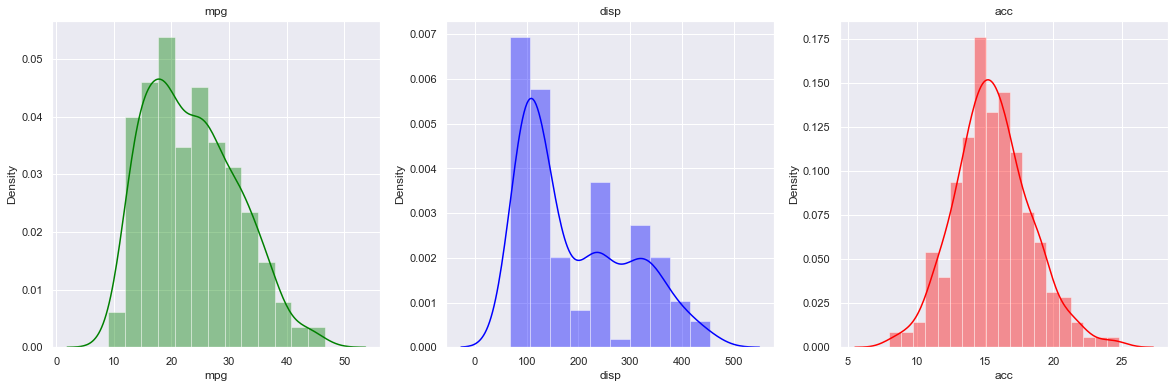

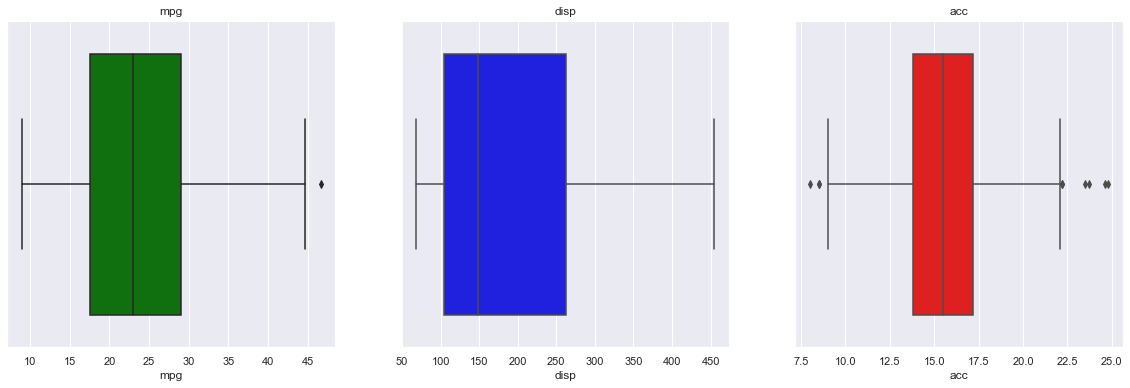

In [20]:
plt.figure(figsize=(20,6))
plt.subplot(1, 3, 1)
plt.title('mpg')
sns.distplot(output['mpg'],color='green')

# subplot 2
plt.subplot(1, 3, 2)
plt.title('disp')
sns.distplot(output['disp'],color='blue')

# subplot 3l
plt.subplot(1, 3, 3)
plt.title('acc')
sns.distplot(output['acc'],color='red')

plt.figure(figsize=(20,6))
plt.subplot(1, 3, 1)
plt.title('mpg')
sns.boxplot(output['mpg'],orient='vertical',color='green')

# subplot 2
plt.subplot(1, 3, 2)
plt.title('disp')
sns.boxplot(output['disp'],orient='vertical',color='blue')

# subplot 3
plt.subplot(1, 3, 3)
plt.title('acc')
sns.boxplot(output['acc'],orient='vertical',color='red')


plt.show()

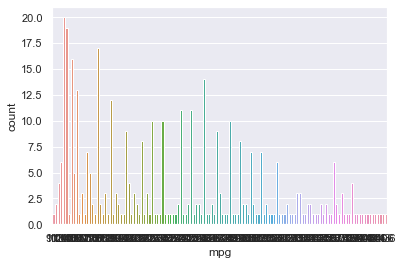

In [21]:
sns.countplot(output['mpg']);

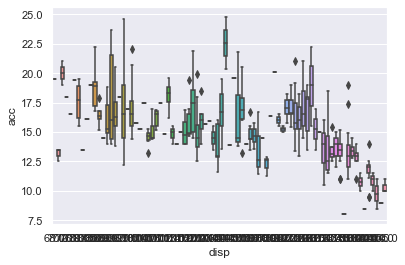

In [22]:
sns.boxplot(output['disp'],output['acc']);

# BIVARIATE

In [23]:
rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10,10))
corr = output.corr()
corr.style

,mpg,cyl,disp,hp,wt,acc,yr,origin
mpg,1.000000,-0.775396,-0.804203,-0.768612,-0.831741,0.420289,0.579267,0.563450
cyl,-0.775396,1.000000,0.950721,0.835720,0.896017,-0.505419,-0.348746,-0.562543
disp,-0.804203,0.950721,1.000000,0.890568,0.932824,-0.543684,-0.370164,-0.609409
hp,-0.768612,0.835720,0.890568,1.000000,0.857788,-0.681232,-0.409177,-0.454656
wt,-0.831741,0.896017,0.932824,0.857788,1.000000,-0.417457,-0.306564,-0.581024
acc,0.420289,-0.505419,-0.543684,-0.681232,-0.417457,1.000000,0.288137,0.205873
yr,0.579267,-0.348746,-0.370164,-0.409177,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.454656,-0.581024,0.205873,0.180662,1.000000


In [24]:
corr.dtypes

mpg       float64
cyl       float64
disp      float64
hp        float64
wt        float64
acc       float64
yr        float64
origin    float64
dtype: object

<AxesSubplot:xlabel='acc', ylabel='cyl'>

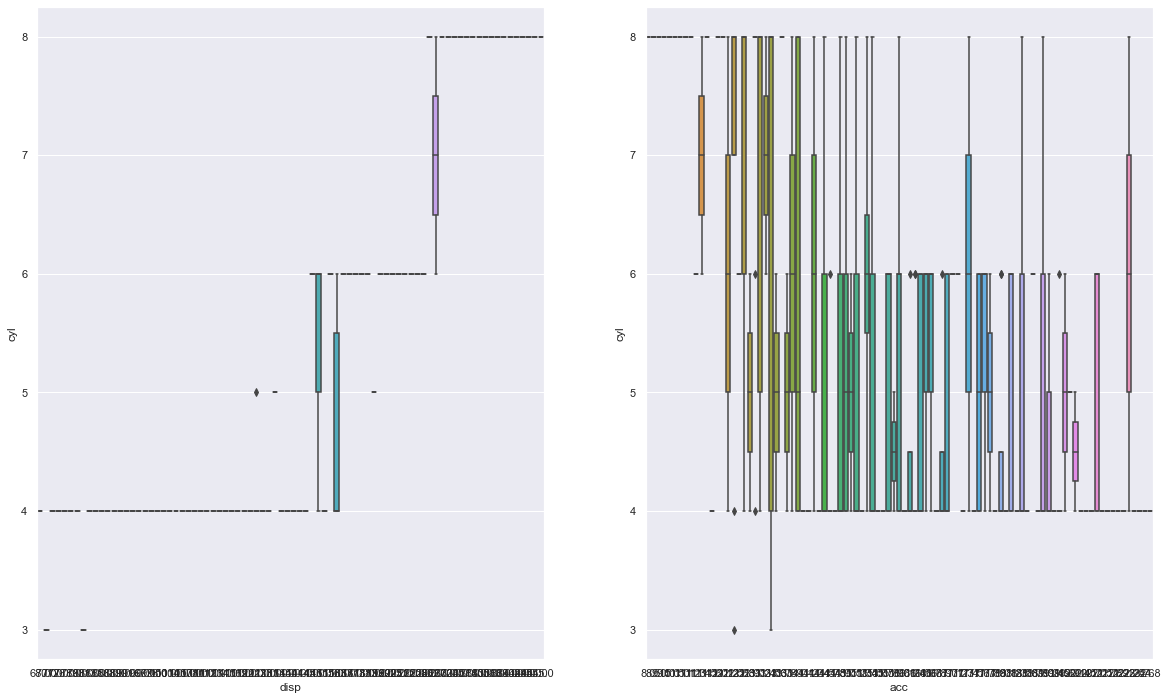

In [25]:
plt.figure(figsize=(20,12))
plt.subplot(1,2,1)
sns.boxplot(x = 'disp', y = 'cyl', data = output)
plt.subplot(1,2,2)
sns.boxplot(x = 'acc', y = 'cyl', data = output)

<AxesSubplot:xlabel='disp', ylabel='cyl'>

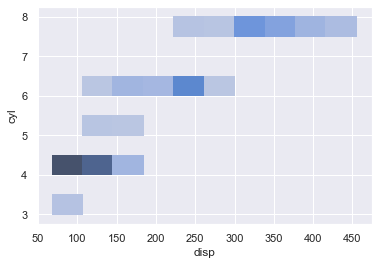

In [26]:
sns.histplot(x = 'disp', y = 'cyl', data = output)

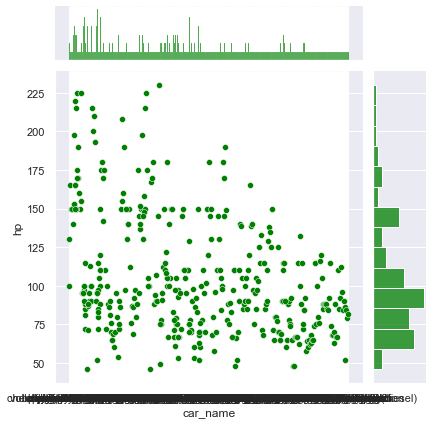

In [27]:
sns.jointplot(output['car_name'],output['hp'],color='green');

<AxesSubplot:>

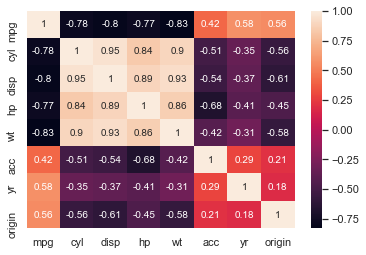

In [28]:
sns.heatmap(output.corr(), annot=True)  # plot the correlation coefficients as a heatmap

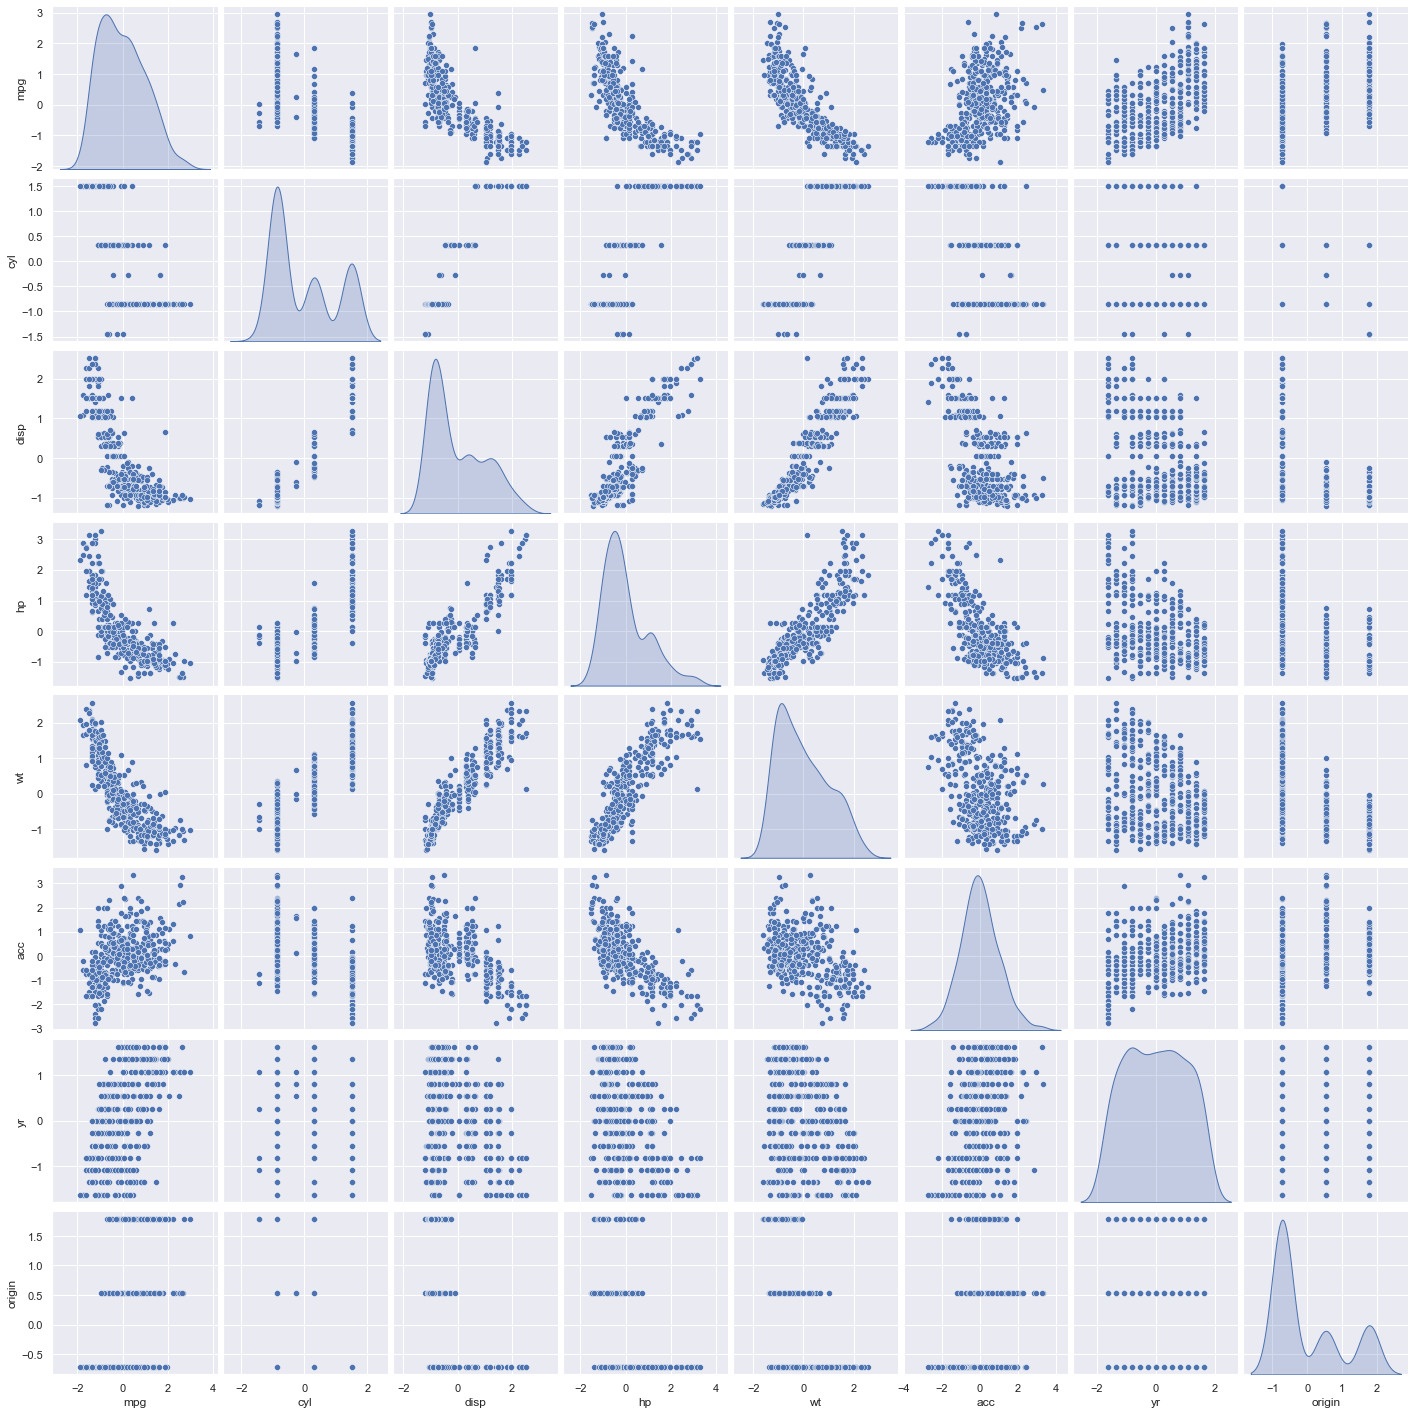

In [29]:
outputAttr=output.iloc[:,1:]
outputScaled=outputAttr.apply(zscore)
sns.pairplot(outputScaled,diag_kind='kde')

# CLUSTING

In [30]:
output = output.drop(["car_name"], axis=1)

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

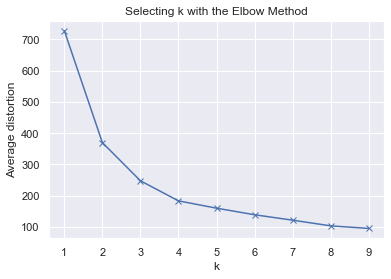

In [31]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(output)
    prediction=model.predict(output)
    meanDistortions.append(sum(np.min(cdist(output, model.cluster_centers_, 'euclidean'), axis=1)) / output.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

In [32]:
 # Let us first start with K = 3
final_model=KMeans(3)
final_model.fit(outputScaled)
prediction=final_model.predict(outputScaled)

#Append the prediction 
output["GROUP"] = prediction
outputScaled["GROUP"] = prediction
print("Groups Assigned : \n")
output.head()

Groups Assigned : 



,mpg,cyl,disp,hp,wt,acc,yr,origin,GROUP
0,18.0,8,307.0,130.0,3504,12.0,70,1,1
1,15.0,8,350.0,165.0,3693,11.5,70,1,1
2,18.0,8,318.0,150.0,3436,11.0,70,1,1
3,16.0,8,304.0,150.0,3433,12.0,70,1,1
4,17.0,8,302.0,140.0,3449,10.5,70,1,1


In [33]:
outputClust = output.groupby(['GROUP'])
outputClust.mean()

,mpg,cyl,disp,hp,wt,acc,yr,origin
GROUP,,,,,,,,
0,30.52795,4.068323,103.422360,77.639752,2234.720497,16.311801,77.155280,2.341615
1,14.71500,7.980000,346.370000,160.550000,4126.910000,12.721000,73.750000,1.000000
2,21.69562,5.240876,187.558394,95.525547,2990.861314,16.772263,76.313869,1.087591


array([[<AxesSubplot:title={'center':'acc'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'cyl'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'disp'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'hp'}, xlabel='[GROUP]'>],
       [<AxesSubplot:title={'center':'mpg'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'origin'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'wt'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'yr'}, xlabel='[GROUP]'>]],
      dtype=object)

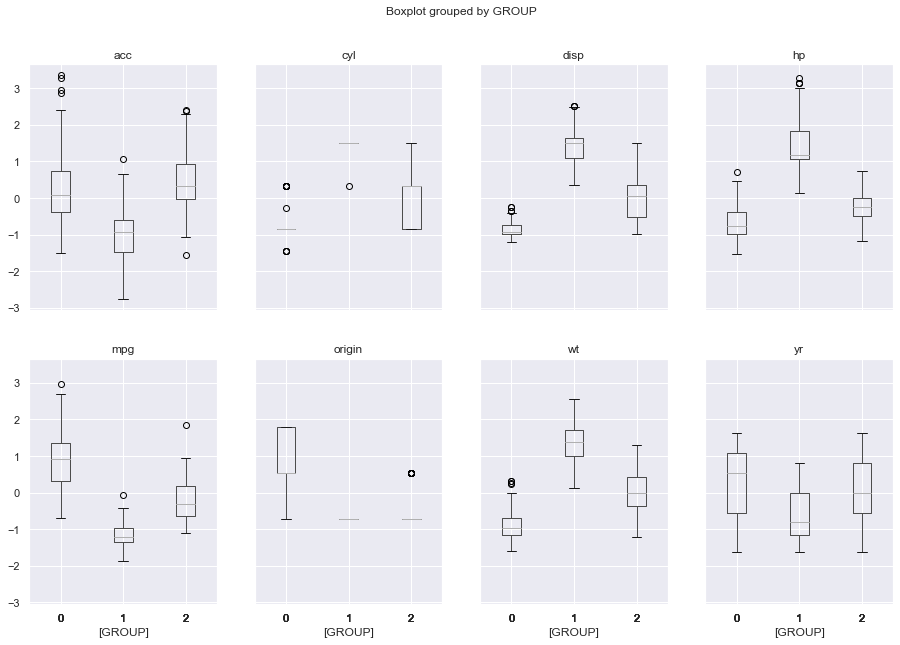

In [34]:
outputScaled.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

In [35]:
# Let us first start with K = 5
final_model=KMeans(5)
final_model.fit(outputScaled)
prediction=final_model.predict(outputScaled)

#Append the prediction 
output["GROUP"] = prediction
output["GROUP"] = prediction
print("Groups Assigned : \n")
output.head()

Groups Assigned : 



,mpg,cyl,disp,hp,wt,acc,yr,origin,GROUP
0,18.0,8,307.0,130.0,3504,12.0,70,1,1
1,15.0,8,350.0,165.0,3693,11.5,70,1,1
2,18.0,8,318.0,150.0,3436,11.0,70,1,1
3,16.0,8,304.0,150.0,3433,12.0,70,1,1
4,17.0,8,302.0,140.0,3449,10.5,70,1,1


In [36]:
outputClust = output.groupby(['GROUP'])
outputClust.mean()

,mpg,cyl,disp,hp,wt,acc,yr,origin
GROUP,,,,,,,,
0,34.666667,4.059524,103.285714,72.095238,2203.964286,16.740476,80.000000,2.202381
1,14.528866,7.979381,348.020619,161.804124,4143.969072,12.641237,73.628866,1.000000
2,24.837097,4.193548,137.411290,90.370968,2651.677419,16.782258,77.290323,1.145161
3,19.161538,6.179487,231.474359,100.564103,3282.948718,16.707692,75.589744,1.038462
4,26.012987,4.077922,103.571429,83.688312,2268.272727,15.844156,74.051948,2.493506


array([[<AxesSubplot:title={'center':'acc'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'cyl'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'disp'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'hp'}, xlabel='[GROUP]'>],
       [<AxesSubplot:title={'center':'mpg'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'origin'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'wt'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'yr'}, xlabel='[GROUP]'>]],
      dtype=object)

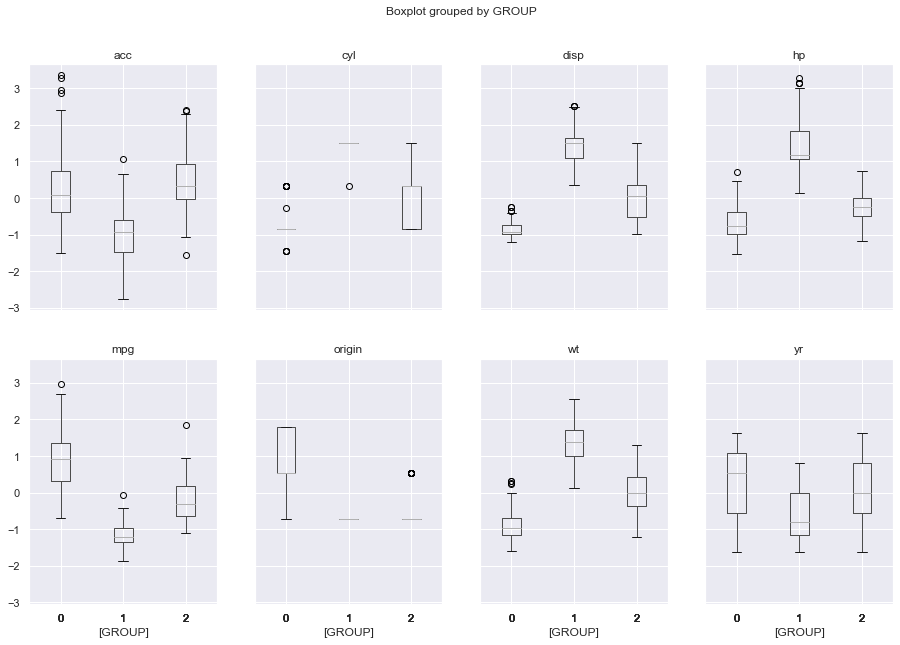

In [37]:
outputScaled.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

# Heirarchical Clustering

In [38]:
#separating numeric variables
cc = output.iloc[:,0:7] 
cc.head()

,mpg,cyl,disp,hp,wt,acc,yr
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70


In [39]:
#scaling the variable
cc_z = cc.apply(zscore)
cc_z.head()

,mpg,cyl,disp,hp,wt,acc,yr
0,-0.706439,1.498191,1.090604,0.664659,0.630870,-1.295498,-1.627426
1,-1.090751,1.498191,1.503514,1.581544,0.854333,-1.477038,-1.627426
2,-0.706439,1.498191,1.196232,1.188593,0.550470,-1.658577,-1.627426
3,-0.962647,1.498191,1.061796,1.188593,0.546923,-1.295498,-1.627426
4,-0.834543,1.498191,1.042591,0.926626,0.565841,-1.840117,-1.627426


In [40]:
#calculating pairwise distance using average linkage method
link_method = linkage(cc_z.iloc[:,0:7], method = 'average')


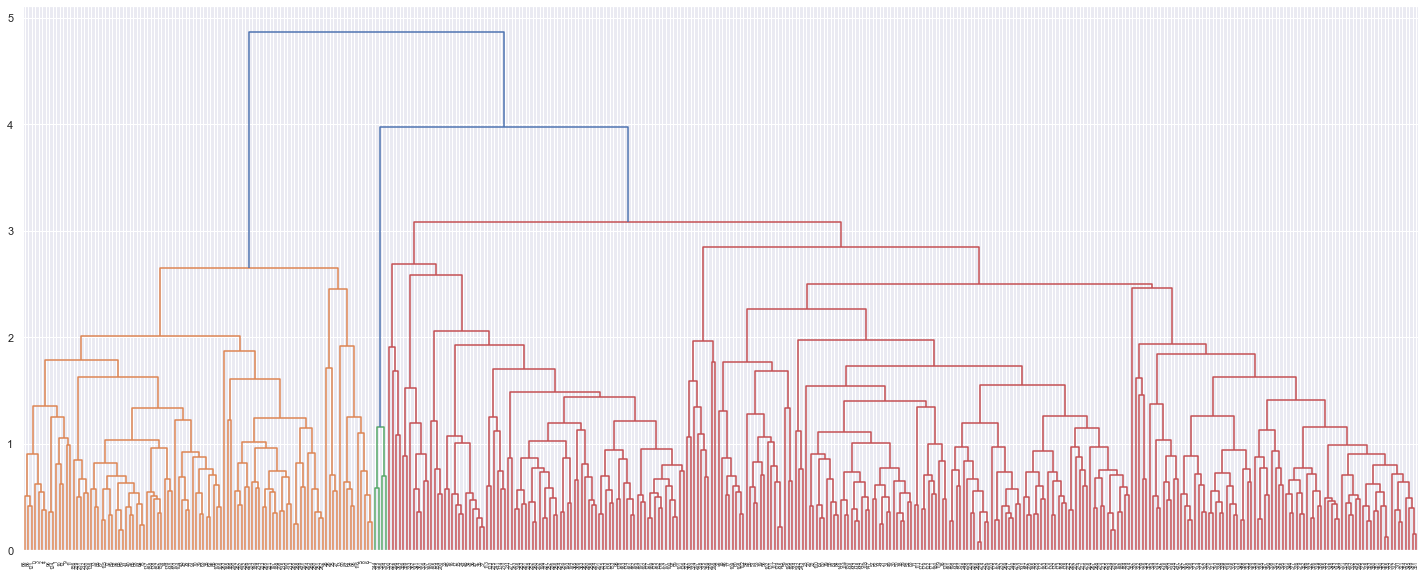

In [41]:
#plotting the H-cluster
plt.figure(figsize=(25, 10))
dendrogram(link_method)
plt.show()

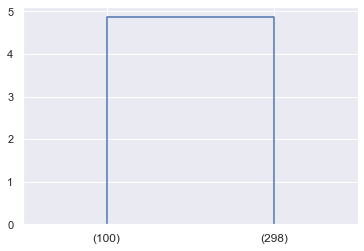

In [42]:
# dendrogram function to arrive at dendrogram
dendrogram(
    link_method,
    truncate_mode='lastp',  
    p=2,  
)
plt.show()

In [43]:
#vieweing the clusters formed
clusters = fcluster(link_method, 2, criterion='maxclust')
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,

In [44]:
cc_z['clusters_H'] = clusters
cc_z.head()

,mpg,cyl,disp,hp,wt,acc,yr,clusters_H
0,-0.706439,1.498191,1.090604,0.664659,0.630870,-1.295498,-1.627426,1
1,-1.090751,1.498191,1.503514,1.581544,0.854333,-1.477038,-1.627426,1
2,-0.706439,1.498191,1.196232,1.188593,0.550470,-1.658577,-1.627426,1
3,-0.962647,1.498191,1.061796,1.188593,0.546923,-1.295498,-1.627426,1
4,-0.834543,1.498191,1.042591,0.926626,0.565841,-1.840117,-1.627426,1


In [45]:
#vieweing the distribution of clusters
cc_z.clusters_H.value_counts().sort_index()

1    100
2    298
Name: clusters_H, dtype: int64

In [46]:
#attaching the clusters formed to the original data
cc['clusters_H']=clusters
output['clusters_H']=clusters
cc.head()

,mpg,cyl,disp,hp,wt,acc,yr,clusters_H
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


In [47]:
#create a new data set named Hclus
Hclus=cc
Hclus.head()

,mpg,cyl,disp,hp,wt,acc,yr,clusters_H
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


In [48]:
#aggregating the numerical variable with the clusters formed with the mean
aggdata=cc.iloc[:,0:8].groupby('clusters_H').mean()
aggdata['Freq']=cc.clusters_H.value_counts().sort_index()
aggdata

,mpg,cyl,disp,hp,wt,acc,yr,Freq
clusters_H,,,,,,,,
1,14.684000,7.980000,345.470000,160.400000,4121.560000,12.702000,73.740000,100
2,26.477852,4.607383,142.404362,85.912752,2584.137584,16.529866,76.771812,298


#Clearly shows two disting group with a difference in average between the  two clusters & variables

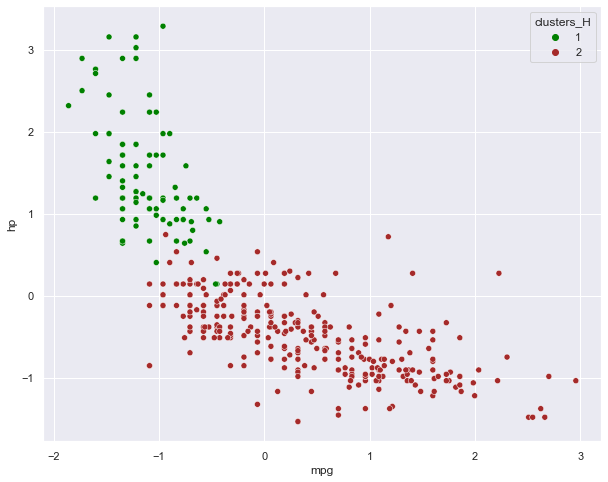

In [49]:
#plotting the clusters formed
plt.figure(figsize=(10, 8))
sns.scatterplot(x="mpg", y="hp", hue="clusters_H",
              data=cc_z, 
                    palette=['green','brown']);

# K-Means Clustering

In [50]:
#seperating the numeric values
cc = output.iloc[:,0:7] 
cc_z1 = cc.apply(zscore)
cc_z1.head()

,mpg,cyl,disp,hp,wt,acc,yr
0,-0.706439,1.498191,1.090604,0.664659,0.630870,-1.295498,-1.627426
1,-1.090751,1.498191,1.503514,1.581544,0.854333,-1.477038,-1.627426
2,-0.706439,1.498191,1.196232,1.188593,0.550470,-1.658577,-1.627426
3,-0.962647,1.498191,1.061796,1.188593,0.546923,-1.295498,-1.627426
4,-0.834543,1.498191,1.042591,0.926626,0.565841,-1.840117,-1.627426


In [51]:
#calculatint the within sum of squares
wss =[] 
for i in range(1,5):
    KM = KMeans(n_clusters=i)
    KM.fit(cc_z1)
    wss.append(KM.inertia_)
wss

[2786.0000000000023, 1298.2115201854017, 949.827339140401, 742.3645301558562]

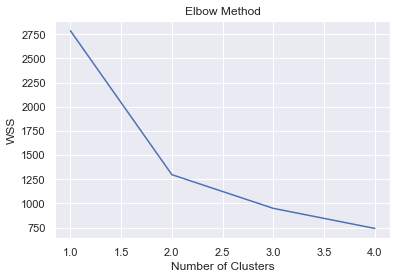

In [52]:
#plotting the WSS against the number of cluster to come up with optimal number of clusters using Elbow-method
plt.plot(range(1,5), wss);
plt.title('Elbow Method');
plt.xlabel("Number of Clusters")
plt.ylabel("WSS");

In [53]:
k_means = KMeans(n_clusters = 2)
k_means.fit(cc_z1)
labels = k_means.labels_

In [54]:
silhouette_score(cc_z1,labels)

0.4812781177516841

In [55]:
#calculating silhouette score for different centroids
kmeans_kwargs = {
   "init": "random",
   "n_init": 10,
   "max_iter": 300,
   "random_state": 42,
}


silhouette_coefficients = []

 # Notice start at 2 clusters for silhouette coefficient
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(cc_z1)
    score = silhouette_score(cc_z1,kmeans.labels_)
    silhouette_coefficients.append(score)

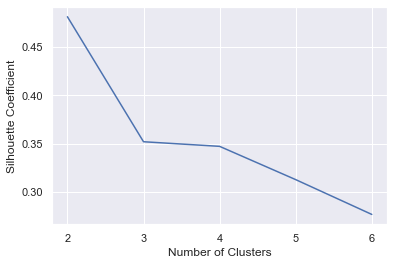

In [56]:
#plotting silhouette score for different centroids
plt.plot(range(2, 7), silhouette_coefficients)
plt.xticks(range(2, 7))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [57]:
#attaching the labels to the datasets
cc["cluster_K"] = labels
output['cluster_K']=labels
Kclus=cc
Kclus.head()

,mpg,cyl,disp,hp,wt,acc,yr,cluster_K
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


In [58]:
#vieweing the distribution of clusters
cc.cluster_K.value_counts().sort_index()

0    293
1    105
Name: cluster_K, dtype: int64

In [59]:
#attaching the clsuters to the scaled data
cc_z1["cluster_K"] = labels
cc_z1.head()

,mpg,cyl,disp,hp,wt,acc,yr,cluster_K
0,-0.706439,1.498191,1.090604,0.664659,0.630870,-1.295498,-1.627426,1
1,-1.090751,1.498191,1.503514,1.581544,0.854333,-1.477038,-1.627426,1
2,-0.706439,1.498191,1.196232,1.188593,0.550470,-1.658577,-1.627426,1
3,-0.962647,1.498191,1.061796,1.188593,0.546923,-1.295498,-1.627426,1
4,-0.834543,1.498191,1.042591,0.926626,0.565841,-1.840117,-1.627426,1


In [60]:
#aggregating the numerical variable with the clusters formed with the mean
aggdata=cc.iloc[:,0:8].groupby('cluster_K').mean()
aggdata['Freq']=cc.cluster_K.value_counts().sort_index()
aggdata

,mpg,cyl,disp,hp,wt,acc,yr,Freq
cluster_K,,,,,,,,
0,26.619113,4.569966,140.250853,85.501706,2567.860068,16.535836,76.822526,293
1,14.851429,7.923810,341.809524,158.000000,4093.771429,12.867619,73.742857,105


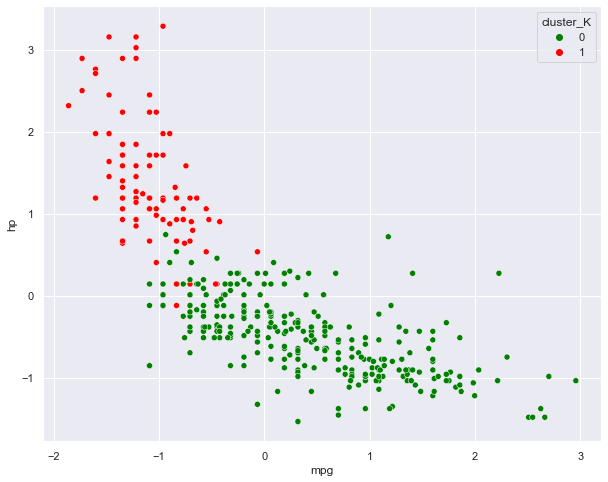

In [61]:
#plotting the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x="mpg", y="hp", hue="cluster_K",
              data=cc_z1, 
                    palette=['green','red']);

In [62]:
output.clusters_H.value_counts().sort_index()

1    100
2    298
Name: clusters_H, dtype: int64

In [63]:
output.cluster_K.value_counts().sort_index()

0    293
1    105
Name: cluster_K, dtype: int64

In [64]:
output.shape

(398, 11)

In [65]:
output.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,GROUP,clusters_H,cluster_K
0,18.0,8,307.0,130.0,3504,12.0,70,1,1,1,1
1,15.0,8,350.0,165.0,3693,11.5,70,1,1,1,1
2,18.0,8,318.0,150.0,3436,11.0,70,1,1,1,1
3,16.0,8,304.0,150.0,3433,12.0,70,1,1,1,1
4,17.0,8,302.0,140.0,3449,10.5,70,1,1,1,1


In [66]:
# lets build our linear model
# independant variables
X = output.drop(['mpg','origin'], axis=1)
# the dependent variable
y = output[['mpg']]

In [67]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [68]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [69]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for cyl is -0.222196703801779
The coefficient for disp is -0.00032491485000400326
The coefficient for hp is -0.026349962924257484
The coefficient for wt is -0.006006758147408417
The coefficient for acc is 0.05883879298077316
The coefficient for yr is 0.4863992156316097
The coefficient for GROUP is -1.3990541147176454
The coefficient for clusters_H is -1.0970841227285713
The coefficient for cluster_K is -0.7198420917436176


In [70]:
intercept = regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is 12.365285725264595


In [71]:
regression_model.score(X_train, y_train)

0.8488479143295468

In [72]:
#out of sample score (R^2)

regression_model.score(X_test, y_test)

0.8726128336941598

In [73]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(X_train2, y_train)

y_pred = poly_clf.predict(X_test2)

#print(y_pred)

#In sample (training) R^2 will always improve with the number of variables!
print(poly_clf.score(X_train2, y_train))

0.9107319027932257


In [74]:
#Out off sample (testing) R^2 is our measure of sucess and does improve
print(poly_clf.score(X_test2, y_test))

0.8454716995714893


In [75]:
# but this improves as the cost of 29 extra variables!
print(X_train.shape)
print(X_train2.shape)

(278, 9)
(278, 46)


#Summary
k-means has the highest variation in dataset

# PART: - 2

 DOMAIN: Manufacturing 
• CONTEXT: Company X curates and packages wine across various vineyards spread throughout the country.
• DATA DESCRIPTION: The data concerns the chemical composition of the wine and its respective quality.
Attribute Information: 
1. A, B, C, D: specific chemical composition measure of the wine
2. Quality: quality of wine [ Low and High ]
• PROJECT OBJECTIVE: Goal is to build a synthetic data generation model using the existing data provided by the company.
Steps and tasks: [ Total Score: 5 points]
1. Design a synthetic data generation model which can impute values [Attribute: Quality] wherever empty the company has missed recording the data.

In [251]:
#Loading the required packages
import numpy as np   
import pandas as pd    
import matplotlib.pyplot as plt 
from scipy.stats import zscore
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
import seaborn as sns
%matplotlib inline 
sns.set(color_codes=True)
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [252]:
wine = pd.read_excel('Part2 - Company.xlsx')

In [253]:
wine.head()

,A,B,C,D,Quality
0,47,27,45,108,Quality A
1,174,133,134,166,Quality B
2,159,163,135,131,NaN
3,61,23,3,44,Quality A
4,59,60,9,68,Quality A


In [254]:
wine.shape

(61, 5)

In [255]:
wine.size

305

In [256]:
# getting total number of rows and column in the dataframe
print(f" Shape of the dataframe = {wine.shape}")
totalrows=wine.shape[0]
print(f" Total number of rows in the dataset =  {totalrows}")

 Shape of the dataframe = (61, 5)
 Total number of rows in the dataset =  61


In [257]:
# Checking Null colunms
file_nullcols = wine.isnull().sum()
file_nullcols

A           0
B           0
C           0
D           0
Quality    18
dtype: int64

In [258]:
wine = wine.copy()

In [259]:
wine = wine.drop('Quality',axis=1)

In [260]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   A       61 non-null     int64
 1   B       61 non-null     int64
 2   C       61 non-null     int64
 3   D       61 non-null     int64
dtypes: int64(4)
memory usage: 2.0 KB


In [261]:
wine.isnull().sum()

A    0
B    0
C    0
D    0
dtype: int64

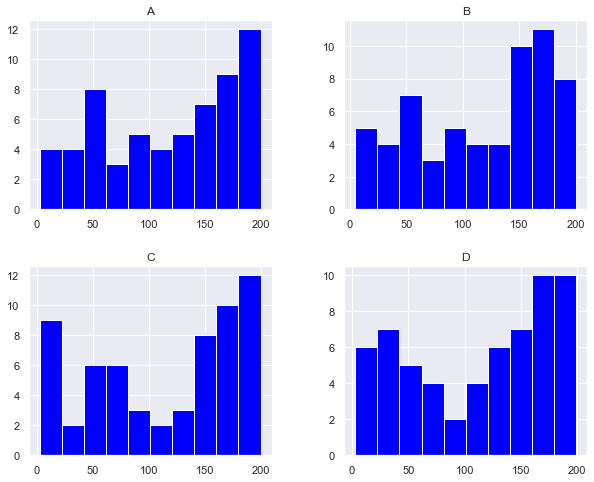

In [262]:
#checking the distribution of the data points
wine.hist(bins = 10, figsize = (10, 8), color = 'blue')
plt.show()

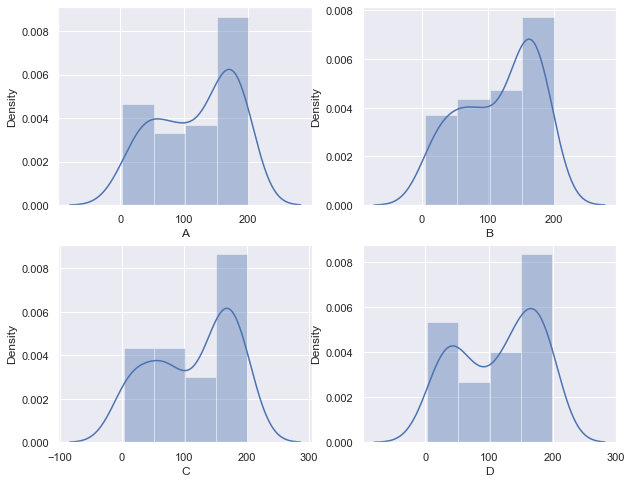

In [263]:
#checking for the density of the variable
plt.figure(figsize=(10, 8))
col = 1
for i in wine.columns:
    plt.subplot(2, 2, col)
    sns.distplot(wine[i], color = 'b')
    col += 1 

In [264]:
#scaling the numeric variables
w1 = wine.apply(zscore)
w1.head()

,A,B,C,D
0,-1.168034,-1.561080,-1.061569,-0.103138
1,0.904992,0.284923,0.306077,0.823013
2,0.660147,0.807376,0.321443,0.264129
3,-0.939512,-1.630740,-1.706975,-1.125099
4,-0.972158,-0.986381,-1.614775,-0.741864


In [267]:
#applying kmeans with 2 centroids
k_means = KMeans(n_clusters = 2)
k_means.fit(w1)
labels = k_means.labels_

In [268]:
# Calculating silhouette_score
silhouette_score(w1,labels)

0.6891674125195145

# PART:-3

DOMAIN: Automobile 
• CONTEXT: The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. 
The vehicle may be viewed from one of many different angles.
• DATA DESCRIPTION: The data contains features extracted from the silhouette of vehicles in different angles. Four "Corgie" model vehicles 
were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of 
vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more 
difficult to distinguish between the cars.
• All the features are numeric i.e. geometric features extracted from the silhouette.
• PROJECT OBJECTIVE: Apply dimensionality reduction technique – PCA and train a model using principal components instead of training the 
model using just the raw data.
Steps and tasks: [ Total Score: 20 points]
1. Data: Import, clean and pre-process the data
2. EDA and visualisation: Create a detailed performance report using univariate, bi-variate and multivariate EDA techniques. Find out all possible hidden 
patterns by using all possible methods.
For example: Use your best analytical approach to build this report. Even you can mix match columns to create new columns which can be used 
for better analysis. Create your own features if required. Be highly experimental and analytical here to find hidden patterns. 
3. Classifier: Design and train a best fit SVM classier using all the data attributes.
4. Dimensional reduction: perform dimensional reduction on the data.
5. Classifier: Design and train a best fit SVM classier using dimensionally reduced attributes.
6. Conclusion: Showcase key pointer on how dimensional reduction helped in this case.

In [93]:
#Loading the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
from sklearn import metrics
%matplotlib inline
sns.set(color_codes=True)
import warnings
warnings.filterwarnings('ignore')

In [121]:
data1= pd.read_csv('Part3 - vehicle.csv')

In [122]:
data1.head(10)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus
5,107,NaN,106.0,172.0,50.0,6,255.0,26.0,28.0,169,280.0,957.0,264.0,85.0,5.0,9.0,181.0,183,bus
6,97,43.0,73.0,173.0,65.0,6,153.0,42.0,19.0,143,176.0,361.0,172.0,66.0,13.0,1.0,200.0,204,bus
7,90,43.0,66.0,157.0,65.0,9,137.0,48.0,18.0,146,162.0,281.0,164.0,67.0,3.0,3.0,193.0,202,van
8,86,34.0,62.0,140.0,61.0,7,122.0,54.0,17.0,127,141.0,223.0,112.0,64.0,2.0,14.0,200.0,208,van
9,93,44.0,98.0,NaN,62.0,11,183.0,36.0,22.0,146,202.0,505.0,152.0,64.0,4.0,14.0,195.0,204,car


In [123]:
data1.fillna(0)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,93,39.0,87.0,183.0,64.0,8,169.0,40.0,20.0,134,200.0,422.0,149.0,72.0,7.0,25.0,188.0,195,car
842,89,46.0,84.0,163.0,66.0,11,159.0,43.0,20.0,159,173.0,368.0,176.0,72.0,1.0,20.0,186.0,197,van
843,106,54.0,101.0,222.0,67.0,12,222.0,30.0,25.0,173,228.0,721.0,200.0,70.0,3.0,4.0,187.0,201,car
844,86,36.0,78.0,146.0,58.0,7,135.0,50.0,18.0,124,155.0,270.0,148.0,66.0,0.0,25.0,190.0,195,car


In [124]:
data1.size

16074

In [125]:
data1.shape

(846, 19)

In [126]:
# getting total number of rows and column in the dataframe
print(f" Shape of the dataframe = {data1.shape}")
totalrows=data1.shape[0]
print(f" Total number of rows in the dataset =  {totalrows}")

 Shape of the dataframe = (846, 19)
 Total number of rows in the dataset =  846


In [127]:
# Checking Null colunms
file_nullcols = data1.isnull().sum()
file_nullcols

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [128]:
data1.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

In [129]:
# Checking basic details of the data
data1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
compactness,846.0,93.678487,8.234474,73.0,87.00,93.0,100.0,119.0
circularity,841.0,44.828775,6.152172,33.0,40.00,44.0,49.0,59.0
distance_circularity,842.0,82.110451,15.778292,40.0,70.00,80.0,98.0,112.0
radius_ratio,840.0,168.888095,33.520198,104.0,141.00,167.0,195.0,333.0
pr.axis_aspect_ratio,844.0,61.678910,7.891463,47.0,57.00,61.0,65.0,138.0
max.length_aspect_ratio,846.0,8.567376,4.601217,2.0,7.00,8.0,10.0,55.0
scatter_ratio,845.0,168.901775,33.214848,112.0,147.00,157.0,198.0,265.0
elongatedness,845.0,40.933728,7.816186,26.0,33.00,43.0,46.0,61.0
pr.axis_rectangularity,843.0,20.582444,2.592933,17.0,19.00,20.0,23.0,29.0
max.length_rectangularity,846.0,147.998818,14.515652,118.0,137.00,146.0,159.0,188.0


In [130]:
data1.dtypes.value_counts()

float64    14
int64       4
object      1
dtype: int64

In [131]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

In [132]:
data1.median()

compactness                     93.0
circularity                     44.0
distance_circularity            80.0
radius_ratio                   167.0
pr.axis_aspect_ratio            61.0
max.length_aspect_ratio          8.0
scatter_ratio                  157.0
elongatedness                   43.0
pr.axis_rectangularity          20.0
max.length_rectangularity      146.0
scaled_variance                179.0
scaled_variance.1              363.5
scaled_radius_of_gyration      173.5
scaled_radius_of_gyration.1     71.5
skewness_about                   6.0
skewness_about.1                11.0
skewness_about.2               188.0
hollows_ratio                  197.0
dtype: float64

In [133]:
#replacing the missing values with median values
for cols in data1.columns:
    if(cols != 'class'): 
        data1[cols] = data1[cols].fillna(data1[cols].median())

# EDA UNIVARIATE

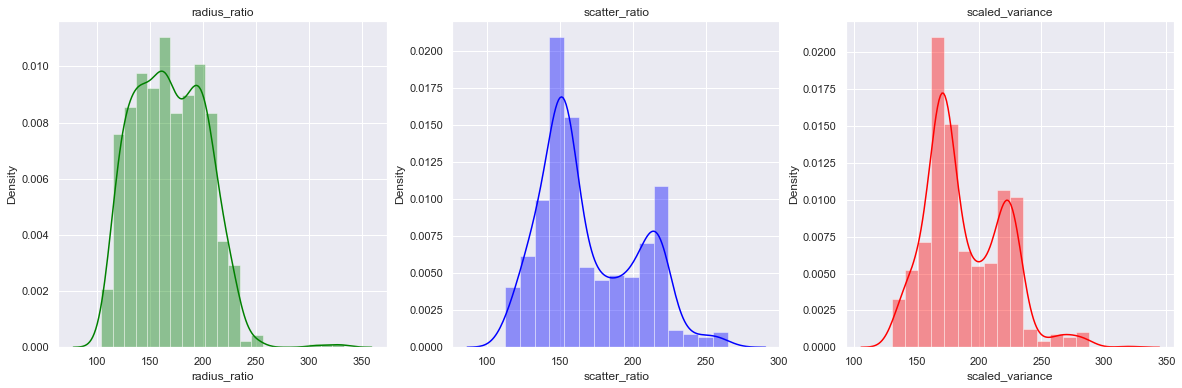

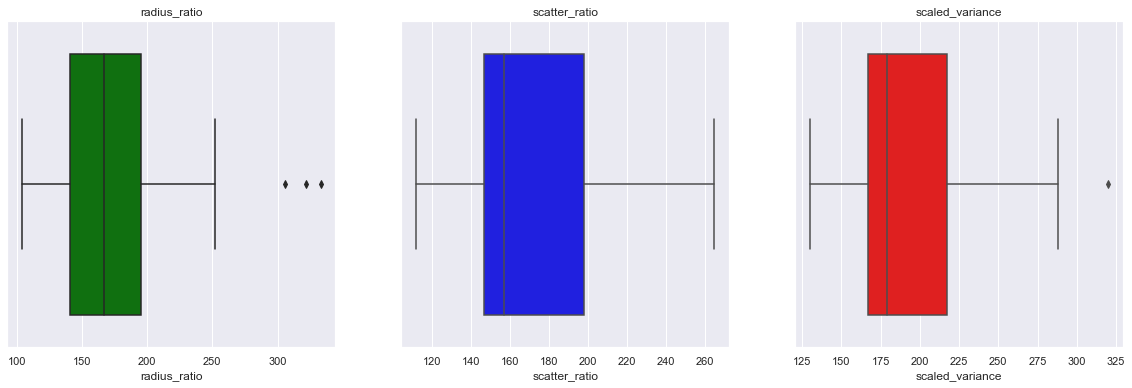

In [134]:
 plt.figure(figsize=(20,6))
plt.subplot(1, 3, 1)
plt.title('radius_ratio')
sns.distplot(data1['radius_ratio'],color='green')

# subplot 2
plt.subplot(1, 3, 2)
plt.title('scatter_ratio')
sns.distplot(data1['scatter_ratio'],color='blue')

# subplot 3l
plt.subplot(1, 3, 3)
plt.title('scaled_variance')
sns.distplot(data1['scaled_variance'],color='red')

plt.figure(figsize=(20,6))
plt.subplot(1, 3, 1)
plt.title('radius_ratio')
sns.boxplot(data1['radius_ratio'],orient='vertical',color='green')

# subplot 2
plt.subplot(1, 3, 2)
plt.title('scatter_ratio')
sns.boxplot(data1['scatter_ratio'],orient='vertical',color='blue')

# subplot 3
plt.subplot(1, 3, 3)
plt.title('scaled_variance')
sns.boxplot(data1['scaled_variance'],orient='vertical',color='red')


plt.show()

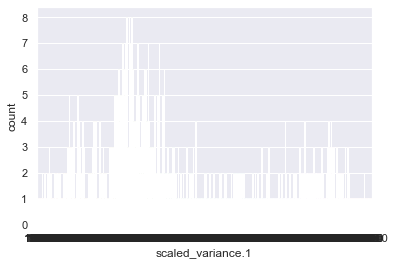

In [135]:
sns.countplot(data1['scaled_variance.1']);

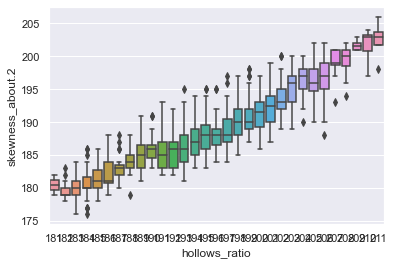

In [136]:
sns.boxplot(data1['hollows_ratio'],data1['skewness_about.2']);

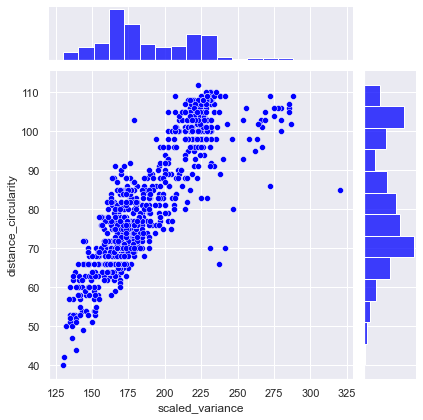

In [137]:
sns.jointplot(data1['scaled_variance'],data1['distance_circularity'],color='blue');

# BIVARIATE

In [138]:
rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10,10))
corr = data1.corr()
corr.style

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
compactness,1.000000,0.684887,0.789928,0.689743,0.091534,0.148249,0.812620,-0.788750,0.813694,0.676143,0.762070,0.814012,0.585243,-0.249593,0.236078,0.157015,0.298537,0.365552
circularity,0.684887,1.000000,0.792320,0.620912,0.153778,0.251467,0.847938,-0.821472,0.843400,0.961318,0.796306,0.835946,0.925816,0.051946,0.144198,-0.011439,-0.104426,0.046351
distance_circularity,0.789928,0.792320,1.000000,0.767035,0.158456,0.264686,0.905076,-0.911307,0.893025,0.774527,0.861519,0.886017,0.705771,-0.225944,0.113924,0.265547,0.146098,0.332732
radius_ratio,0.689743,0.620912,0.767035,1.000000,0.663447,0.450052,0.734429,-0.789481,0.708385,0.568949,0.793415,0.718436,0.536372,-0.180397,0.048713,0.173741,0.382214,0.471309
pr.axis_aspect_ratio,0.091534,0.153778,0.158456,0.663447,1.000000,0.648724,0.103732,-0.183035,0.079604,0.126909,0.272910,0.089189,0.121971,0.152950,-0.058371,-0.031976,0.239886,0.267725
max.length_aspect_ratio,0.148249,0.251467,0.264686,0.450052,0.648724,1.000000,0.166191,-0.180140,0.161502,0.305943,0.318957,0.143253,0.189743,0.295735,0.015599,0.043422,-0.026081,0.143919
scatter_ratio,0.812620,0.847938,0.905076,0.734429,0.103732,0.166191,1.000000,-0.971601,0.989751,0.809083,0.948662,0.993012,0.799875,-0.027542,0.074458,0.212428,0.005628,0.118817
elongatedness,-0.788750,-0.821472,-0.911307,-0.789481,-0.183035,-0.180140,-0.971601,1.000000,-0.948996,-0.775854,-0.936382,-0.953816,-0.766314,0.103302,-0.052600,-0.185053,-0.115126,-0.216905
pr.axis_rectangularity,0.813694,0.843400,0.893025,0.708385,0.079604,0.161502,0.989751,-0.948996,1.000000,0.810934,0.934227,0.988213,0.796690,-0.015495,0.083767,0.214700,-0.018649,0.099286
max.length_rectangularity,0.676143,0.961318,0.774527,0.568949,0.126909,0.305943,0.809083,-0.775854,0.810934,1.000000,0.744985,0.794615,0.866450,0.041622,0.135852,0.001366,-0.103948,0.076770


In [139]:
corr.dtypes

compactness                    float64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio        float64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity      float64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                  float64
dtype: object

<AxesSubplot:xlabel='elongatedness', ylabel='skewness_about'>

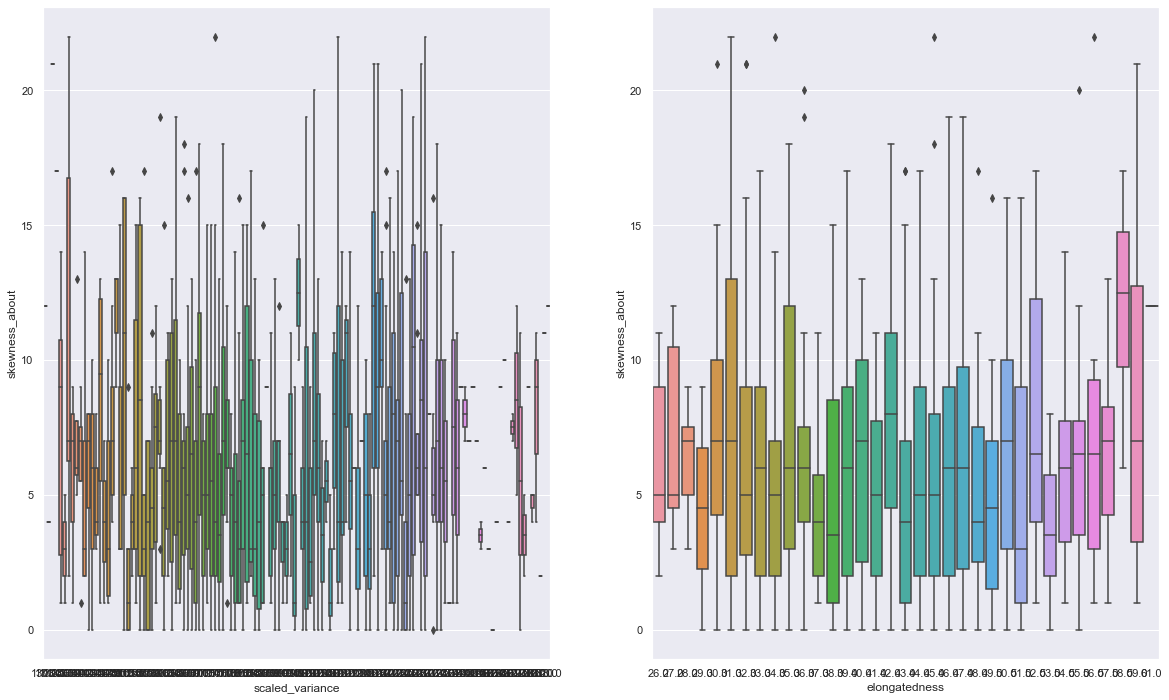

In [140]:
plt.figure(figsize=(20,12))
plt.subplot(1,2,1)
sns.boxplot(x = 'scaled_variance', y = 'skewness_about', data = data1)
plt.subplot(1,2,2)
sns.boxplot(x = 'elongatedness', y = 'skewness_about', data = data1)

car    429
bus    218
van    199
Name: class, dtype: int64


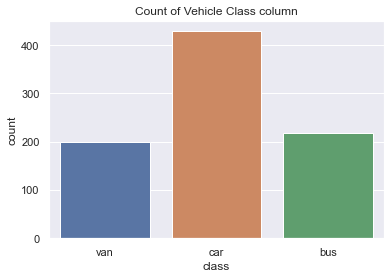

In [141]:
#checking the distribution of the class variable
print(data1['class'].value_counts())
plt.title('Count of Vehicle Class column')
sns.countplot(x = 'class', data = data1);

<AxesSubplot:xlabel='hollows_ratio', ylabel='scatter_ratio'>

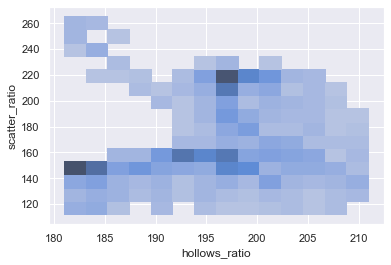

In [142]:
sns.histplot(x = 'hollows_ratio', y = 'scatter_ratio', data = data1)

<AxesSubplot:>

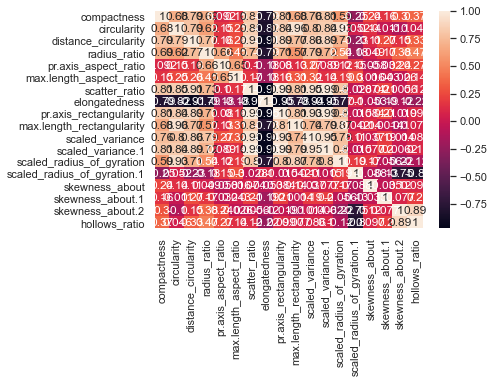

In [143]:
sns.heatmap(data1.corr(), annot=True)  # plot the correlation coefficients as a heatmap

In [144]:
#splitting the data to check for correlation with the class variable
X = data1.loc[:, data1.columns != 'class']
y = data1['class'].astype('category').cat.codes

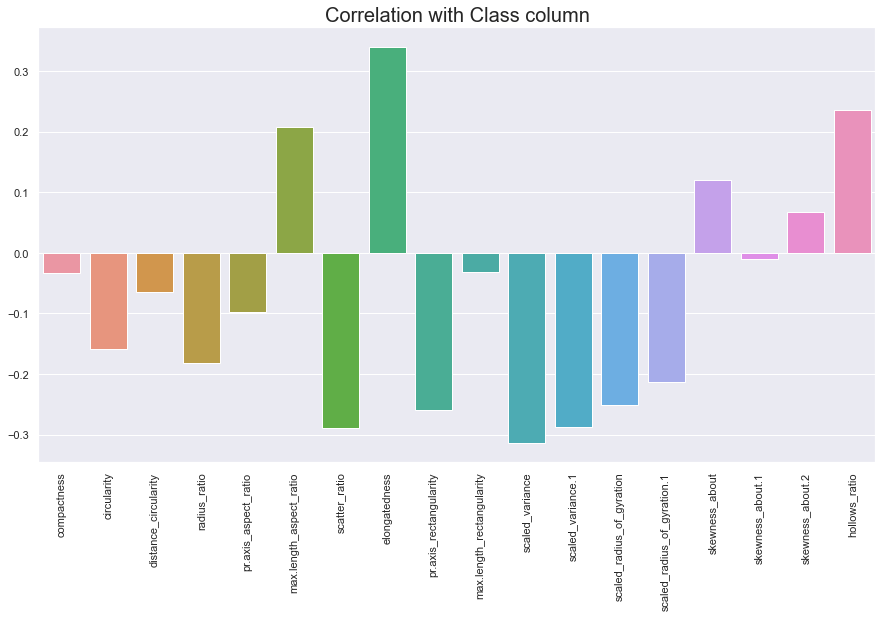

In [145]:
#plotting the correlation with target variable
plt.figure(figsize = (15, 8))
ax=sns.barplot(x=X.columns, y = X.corrwith(y))
sns.barplot(x = X.columns, y = X.corrwith(y))
plt.title('Correlation with Class column', fontsize = 20)
x=plt.setp(ax.get_xticklabels(), rotation=90)

In [146]:
#scaling the muerica variables
XScaled=X.apply(zscore)
XScaled.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,0.160580,0.518073,0.057177,0.273363,1.310398,0.311542,-0.207598,0.136262,-0.224342,0.758332,-0.401920,-0.341934,0.285705,-0.327326,-0.073812,0.380870,-0.312012,0.183957
1,-0.325470,-0.623732,0.120741,-0.835032,-0.593753,0.094079,-0.599423,0.520519,-0.610886,-0.344578,-0.593357,-0.619724,-0.513630,-0.059384,0.538390,0.156798,0.013265,0.452977
2,1.254193,0.844303,1.519141,1.202018,0.548738,0.311542,1.148719,-1.144597,0.935290,0.689401,1.097671,1.109379,1.392477,0.074587,1.558727,-0.403383,-0.149374,0.049447
3,-0.082445,-0.623732,-0.006386,-0.295813,0.167907,0.094079,-0.750125,0.648605,-0.610886,-0.344578,-0.912419,-0.738777,-1.466683,-1.265121,-0.073812,-0.291347,1.639649,1.529056
4,-1.054545,-0.134387,-0.769150,1.082192,5.245643,9.444962,-0.599423,0.520519,-0.610886,-0.275646,1.671982,-0.648070,0.408680,7.309005,0.538390,-0.179311,-1.450481,-1.699181


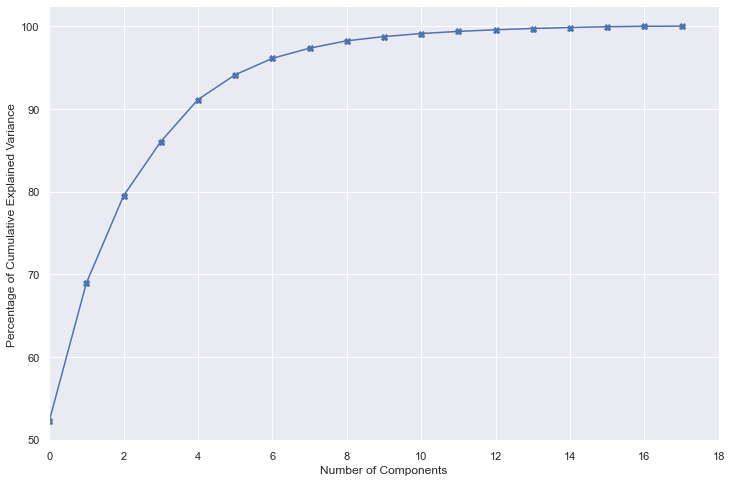

In [147]:
#PCA
pca = PCA()
X_pca_ = pca.fit_transform(XScaled)
plt.figure(figsize = (12, 8))
plt.plot((np.cumsum(pca.explained_variance_ratio_) * 100), marker = 'X')
plt.xlim(0, 18)
plt.xlabel('Number of Components')
plt.ylabel('Percentage of Cumulative Explained Variance');

In [148]:
print(pca.explained_variance_)

[9.40460261e+00 3.01492206e+00 1.90352502e+00 1.17993747e+00
 9.17260633e-01 5.39992629e-01 3.58870118e-01 2.21932456e-01
 1.60608597e-01 9.18572234e-02 6.64994118e-02 4.66005994e-02
 3.57947189e-02 2.74120657e-02 2.05792871e-02 1.79166314e-02
 1.00257898e-02 2.96445743e-03]


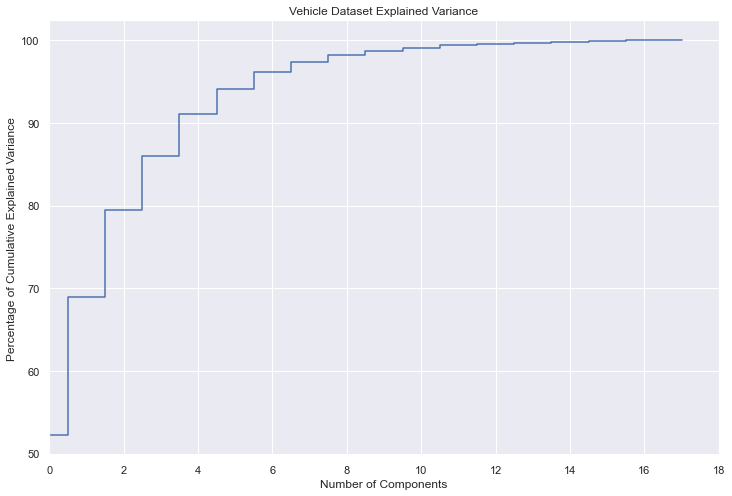

In [149]:
#plotting the
plt.figure(figsize = (12, 8))
plt.step(list(range(18)), (np.cumsum(pca.explained_variance_ratio_) * 100), where = 'mid')
plt.xlim(0, 18)
plt.xlabel('Number of Components')
plt.ylabel('Percentage of Cumulative Explained Variance')
plt.title('Vehicle Dataset Explained Variance');

Between first 5 components, more than 91% of the information is captured. The above plot shows almost 95% variance by the first 6 components. Therefore we can drop 7th component onwards.

In [150]:
#Using 6 components and printing the eigen vectors
pca3 = PCA(n_components=6)
pca3.fit(XScaled)
print(pca3.components_)
print(pca3.explained_variance_ratio_)
Xpca3 = pca3.transform(XScaled)

[[ 2.75283688e-01  2.93258469e-01  3.04609128e-01  2.67606877e-01
   8.05039890e-02  9.72756855e-02  3.17092750e-01 -3.14133155e-01
   3.13959064e-01  2.82830900e-01  3.09280359e-01  3.13788457e-01
   2.72047492e-01 -2.08137692e-02  4.14555082e-02  5.82250207e-02
   3.02795063e-02  7.41453913e-02]
 [-1.26953763e-01  1.25576727e-01 -7.29516436e-02 -1.89634378e-01
  -1.22174860e-01  1.07482875e-02  4.81181371e-02  1.27498515e-02
   5.99352482e-02  1.16220532e-01  6.22806229e-02  5.37843596e-02
   2.09233172e-01  4.88525148e-01 -5.50899716e-02 -1.24085090e-01
  -5.40914775e-01 -5.40354258e-01]
 [-1.19922479e-01 -2.48205467e-02 -5.60143254e-02  2.75074211e-01
   6.42012966e-01  5.91801304e-01 -9.76283108e-02  5.76484384e-02
  -1.09512416e-01 -1.70641987e-02  5.63239801e-02 -1.08840729e-01
  -3.14636493e-02  2.86277015e-01 -1.15679354e-01 -7.52828901e-02
   8.73592034e-03  3.95242743e-02]
 [ 7.83843562e-02  1.87337408e-01 -7.12008427e-02 -4.26053415e-02
   3.27257119e-02  3.14147277e-02 -9.

In [151]:
#printing the original features and the reduced features
pca_6 = PCA(n_components = 6)
X_pca = pca_6.fit_transform(XScaled)
print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_pca.shape[1])

Original number of features: 18
Reduced number of features: 6


In [152]:
#viewing the first 5 observations of the pca components
pca_df = pd.DataFrame(data = X_pca)
pca_df.head()

,0,1,2,3,4,5
0,0.334162,-0.219026,1.001584,0.176612,0.079301,-0.757447
1,-1.591711,-0.420603,-0.369034,0.233234,0.693949,-0.517162
2,3.769324,0.195283,0.087859,1.202212,0.731732,0.705041
3,-1.738598,-2.829692,0.109456,0.376685,-0.362897,-0.484431
4,0.558103,4.758422,11.703647,0.147464,3.256953,-0.203446


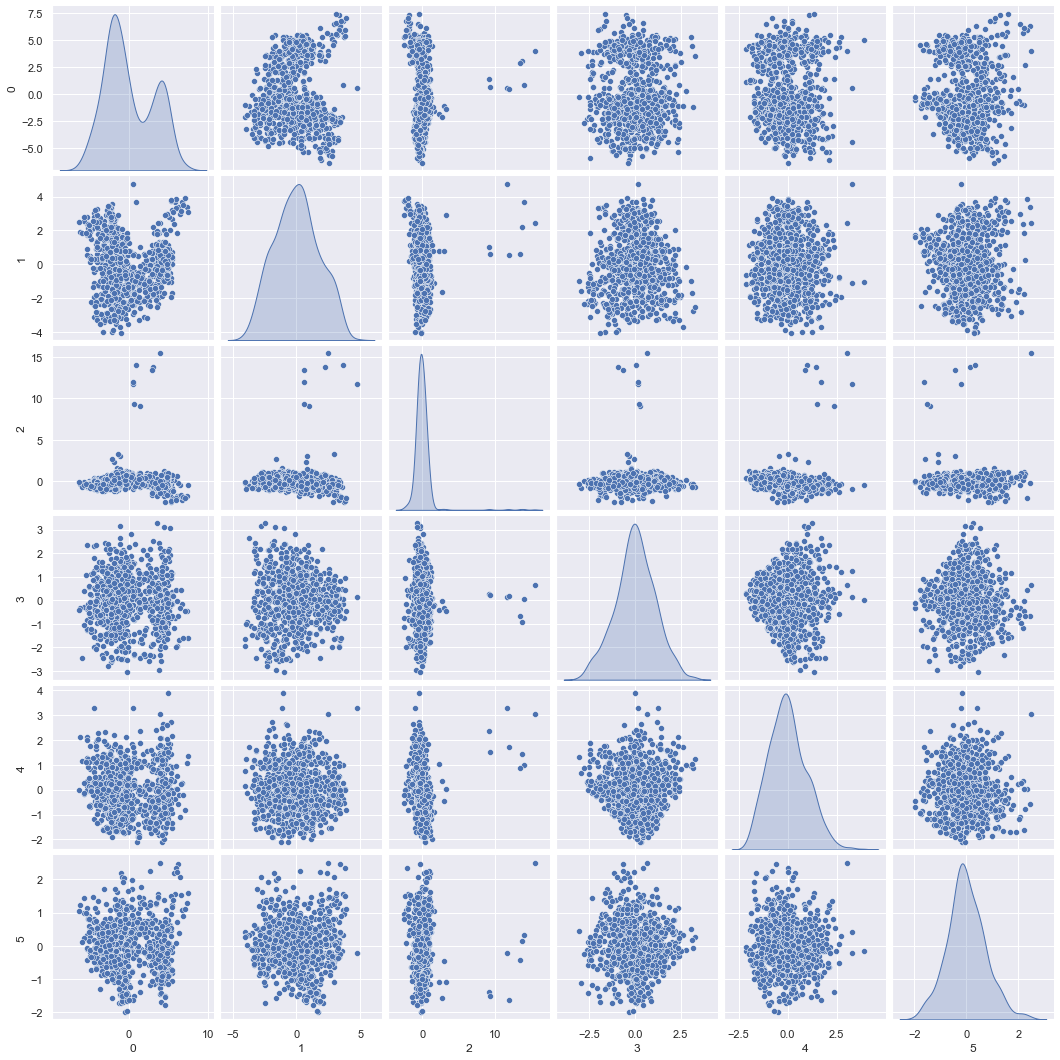

In [153]:
sns.pairplot(pca_df, diag_kind = 'kde');

In [154]:
#SVM
#splitting the original data into train and test 70:30
X_train, X_test, y_train, y_test = train_test_split(XScaled, y, test_size = 0.3, random_state = 10)

In [155]:
rtr, ctr = X_train.shape
print('The training set comprises of', rtr, 'rows and', ctr, 'columns.')

The training set comprises of 592 rows and 18 columns.


In [156]:
rt, ct = X_test.shape
print('The test set comprises of', rt, 'rows and', ct, 'columns.')

The test set comprises of 254 rows and 18 columns.


In [157]:
#splitting the pca data into train and test 70:30
X_tr, X_te, y_tr, y_te = train_test_split(X_pca, y, test_size = 0.3, random_state = 10)

In [158]:
rtr_pca, ctr_pca = X_tr.shape
print('The PCA training set comprises of', rtr_pca, 'rows and', ctr_pca, 'columns.')

The PCA training set comprises of 592 rows and 6 columns.


In [160]:
rt_pca, ct_pca = X_te.shape
print('The PCA test set comprises of', rt_pca, 'rows and', ct_pca, 'columns.')

The PCA test set comprises of 254 rows and 6 columns.


In [161]:
# Building a Support Vector Machine on train data
svc_model = SVC(C= 4, kernel='rbf', gamma='scale')
svc_model.fit(X_train, y_train)

SVC(C=4)

In [162]:
#predicting on train data
sv_train_predict = svc_model .predict(X_train)
print("Model Accuracy on train: {0:.4f}".format(metrics.accuracy_score(y_train, sv_train_predict)))
print()

Model Accuracy on train: 0.9899



In [163]:
#predicting on test data
sv_test_predict = svc_model .predict(X_test)
print("Model Accuracy on test: {0:.4f}".format(metrics.accuracy_score(y_test, sv_test_predict)))
print()

Model Accuracy on test: 0.9764



In [165]:
#printing classification report
print("Classification Report")
print(metrics.classification_report(y_test, sv_test_predict, labels=[0,1,2]))

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        71
           1       1.00      0.97      0.98       125
           2       0.91      1.00      0.95        58

    accuracy                           0.98       254
   macro avg       0.97      0.98      0.97       254
weighted avg       0.98      0.98      0.98       254



In [167]:
precision_SV, recall_SV, f1_score_SV, support = precision_recall_fscore_support(y_test, sv_test_predict,average='macro')
print('Precision Score :', '%0.2f' % precision_SV)
print('Recall Score :', '%0.2f' % recall_SV)
print('F1-Score:', '%0.2f' % f1_score_SV)
SV_Acc= accuracy_score(y_test, sv_test_predict)
print('Accuracy Score :','%0.2f' % SV_Acc)

Precision Score : 0.97
Recall Score : 0.98
F1-Score: 0.97
Accuracy Score : 0.98


In [168]:
#SVM on the pca data
svc_model_pca = SVC(C= 4, kernel='rbf', gamma='scale')
svc_model_pca.fit(X_tr, y_tr)

SVC(C=4)

In [169]:
#predicting on train data
sv_tr_predict = svc_model_pca .predict(X_tr)
print("Model Accuracy on train: {0:.4f}".format(metrics.accuracy_score(y_tr, sv_tr_predict)))
print()

Model Accuracy on train: 0.9324



In [170]:
#predicting on test data
sv_te_predict = svc_model_pca .predict(X_te)
print("Model Accuracy on test: {0:.4f}".format(metrics.accuracy_score(y_te, sv_te_predict)))
print()

Model Accuracy on test: 0.9134



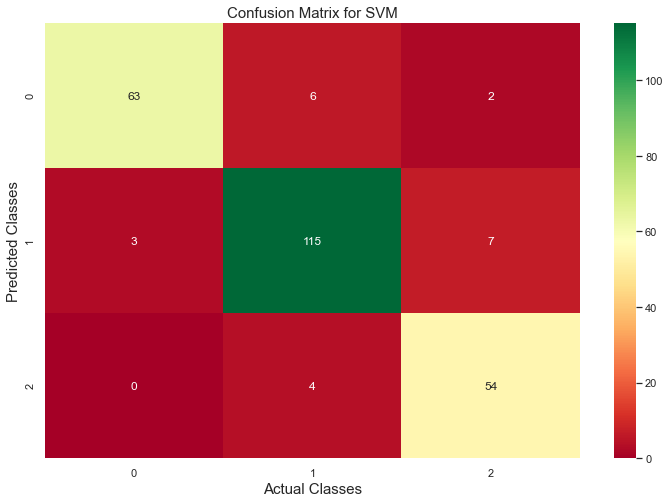

In [171]:
#visualization of confusion matrix in the form of a heatmap
cm= confusion_matrix(y_te, sv_te_predict)
plt.figure(figsize = (12, 8))
sns.heatmap(cm, annot = True, cmap = 'RdYlGn', fmt = 'd')
plt.xlabel('Actual Classes', fontsize = 15)
plt.ylabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix for SVM', fontsize = 15);

In [172]:
#printing classification report
print("Classification Report")
print(metrics.classification_report(y_te, sv_te_predict, labels=[0,1,2]))

Classification Report
              precision    recall  f1-score   support

           0       0.95      0.89      0.92        71
           1       0.92      0.92      0.92       125
           2       0.86      0.93      0.89        58

    accuracy                           0.91       254
   macro avg       0.91      0.91      0.91       254
weighted avg       0.92      0.91      0.91       254



In [173]:
precision_SV_pca, recall_SV_pca, f1_score_SV_pca, support_pca = precision_recall_fscore_support(y_te, sv_te_predict,average='macro')
print('Precision Score :', '%0.2f' % precision_SV_pca)
print('Recall Score :', '%0.2f' % recall_SV_pca)
print('F1-Score:', '%0.2f' % f1_score_SV_pca)
SV_Acc_pca= accuracy_score(y_te, sv_te_predict)
print('Accuracy Score :','%0.2f' % SV_Acc_pca)

Precision Score : 0.91
Recall Score : 0.91
F1-Score: 0.91
Accuracy Score : 0.91


In [174]:
modellists = []
modellists.append(['Support Vector Classifier without PCA', SV_Acc * 100, recall_SV * 100, precision_SV * 100,f1_score_SV*100])
modellists.append(['Support Vector Classifier with PCA', SV_Acc_pca* 100, recall_SV_pca * 100, precision_SV_pca * 100,f1_score_SV_pca*100])
mdl_df = pd.DataFrame(modellists, columns = ['Model','Accuracy Score of Test Data', 'Recall Score', 'Precision Score','F1 Score'])
mdl_df

,Model,Accuracy Score of Test Data,Recall Score,Precision Score,F1 Score
0,Support Vector Classifier without PCA,97.637795,97.994366,96.875000,97.342460
1,Support Vector Classifier with PCA,91.338583,91.278614,91.056277,91.075667



both models give accuracy more than 90% PCA used only 6 attributes to come up with an accuracy of 90%+ where as the model without pca used all the variables to come up with 90%+ accuracy

# PART:-4

• DOMAIN: Sports management 
• CONTEXT: Company X is a sports management company for international cricket. 
• DATA DESCRIPTION: The data is collected belongs to batsman from IPL series conducted so far. Attribute Information: 
1. Runs: Runs score by the batsman
2. Ave: Average runs scored by the batsman per match
3. SR: strike rate of the batsman
4. Fours: number of boundary/four scored
5. Six: number of boundary/six scored
6. HF: number of half centuries scored so far
• PROJECT OBJECTIVE: Goal is to build a data driven batsman ranking model for the sports management company to make business decisions.
Steps and tasks: [ Total Score: 5 points]
1. EDA and visualisation: Create a detailed performance report using univariate, bi-variate and multivariate EDA techniques. Find out all possible hidden 
patterns by using all possible methods.
2. Build a data driven model to rank all the players in the dataset using all or the most important performance features.

In [175]:
#loading the required packages
import numpy as np   
import pandas as pd    
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from scipy.stats import zscore
from sklearn.metrics import silhouette_samples, silhouette_score
import seaborn as sns
%matplotlib inline 
sns.set(color_codes=True)
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [202]:
#importing the data
data2=pd.read_csv('./Part4 - batting_bowling_ipl_bat.csv')
data2=data2.dropna(axis=0)
data2.head()

,Name,Runs,Ave,SR,Fours,Sixes,HF
1,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0
3,G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0
5,V Sehwag,495.0,33.00,161.23,57.0,19.0,5.0
7,CL White,479.0,43.54,149.68,41.0,20.0,5.0
9,S Dhawan,569.0,40.64,129.61,58.0,18.0,5.0


In [203]:
#EDA
#checking for the dimension of the data
rows, column = data2.shape
print('The dataset contains', rows, 'rows and', column, 'columns.')

The dataset contains 90 rows and 7 columns.


In [204]:
#checking for the data type
print('The data type of each attribute: \n')
data2.info()

The data type of each attribute: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 1 to 179
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    90 non-null     object 
 1   Runs    90 non-null     float64
 2   Ave     90 non-null     float64
 3   SR      90 non-null     float64
 4   Fours   90 non-null     float64
 5   Sixes   90 non-null     float64
 6   HF      90 non-null     float64
dtypes: float64(6), object(1)
memory usage: 5.6+ KB


In [205]:
data.shape

(398, 1)

In [206]:
data.size

398

In [207]:
# getting total number of rows and column in the dataframe
print(f" Shape of the dataframe = {ipl.shape}")
totalrows=ipl.shape[0]
print(f" Total number of rows in the dataset =  {totalrows}")

 Shape of the dataframe = (180, 7)
 Total number of rows in the dataset =  180


In [208]:
# Checking Null colunms
file_nullcols = data.isnull().sum()
file_nullcols

car_name    0
dtype: int64

In [209]:
data.dtypes

car_name    object
dtype: object

In [210]:
data.mean()

Series([], dtype: float64)

In [185]:
data.isnull().values.any() 

True

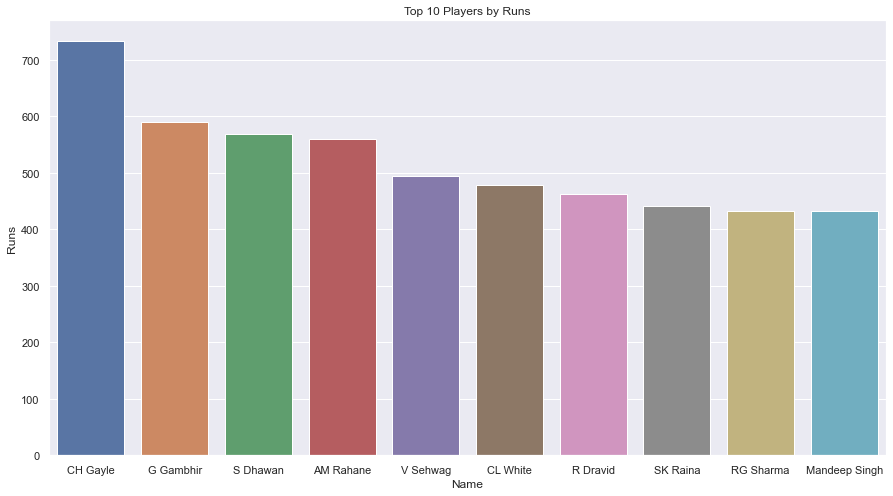

In [212]:
plt.figure(figsize=(15,8))
b1=data2.groupby('Name')['Runs'].sum().sort_values(ascending = False ).head(10)
b1= b1.reset_index() 
b1.columns = ['Name' ,'Runs']
sns.barplot(data= b1 , x= 'Name' , y ='Runs');
plt.title("Top 10 Players by Runs");

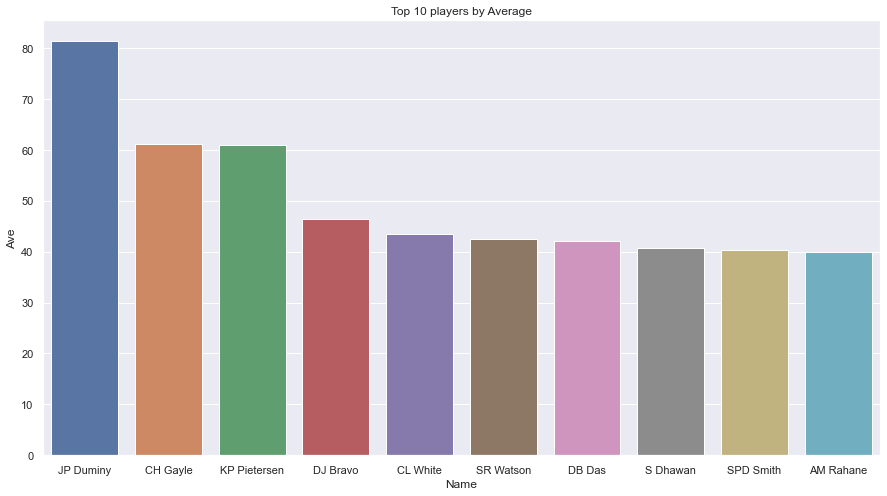

In [217]:
plt.figure(figsize=(15,8))
b1=data2.groupby('Name')['Ave'].sum().sort_values(ascending = False ).head(10)
b1= b1.reset_index() 
b1.columns = ['Name' ,'Ave']
sns.barplot(data= b1 , x= 'Name' , y ='Ave')
plt.title("Top 10 players by Average");

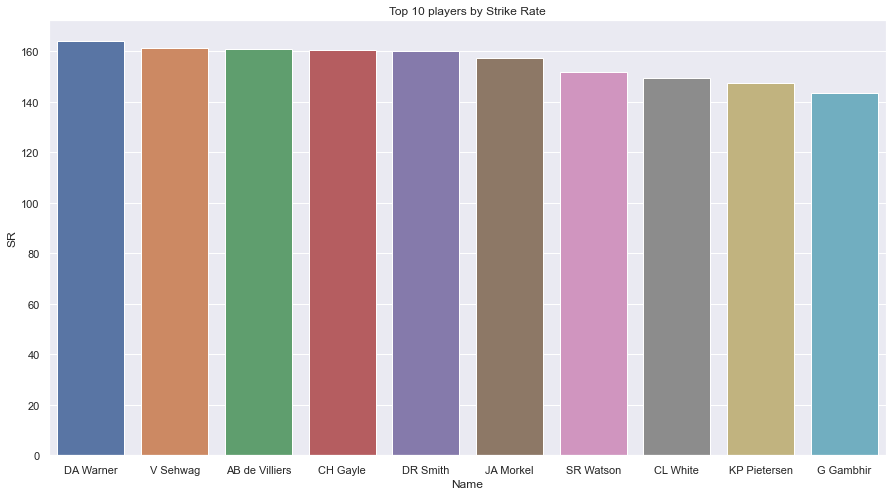

In [218]:
plt.figure(figsize=(15,8))
b1=data2.groupby('Name')['SR'].sum().sort_values(ascending = False ).head(10)
b1= b1.reset_index() 
b1.columns = ['Name' ,'SR']
sns.barplot(data= b1 , x= 'Name' , y ='SR')
plt.title("Top 10 players by Strike Rate");
plt.show()

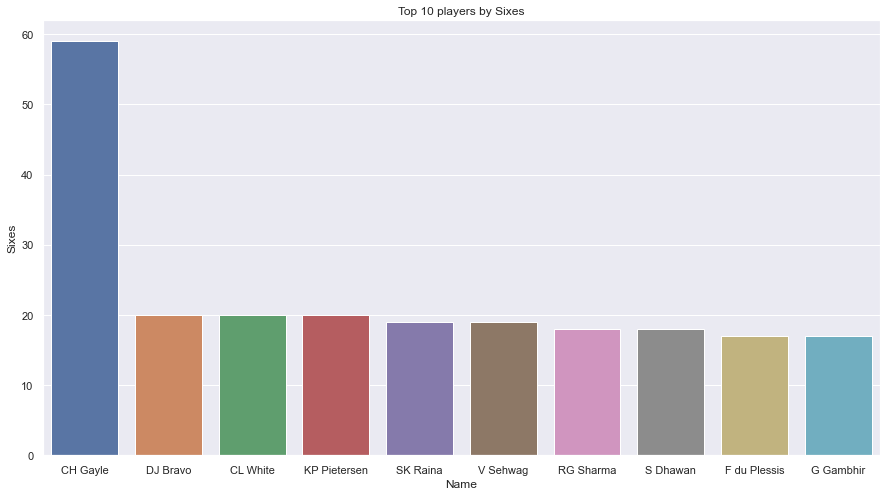

In [219]:
plt.figure(figsize=(15,8))
b1=data2.groupby('Name')['Sixes'].sum().sort_values(ascending = False ).head(10)
b1= b1.reset_index() 
b1.columns = ['Name' ,'Sixes']
sns.barplot(data= b1 , x= 'Name' , y ='Sixes')
plt.title("Top 10 players by Sixes");

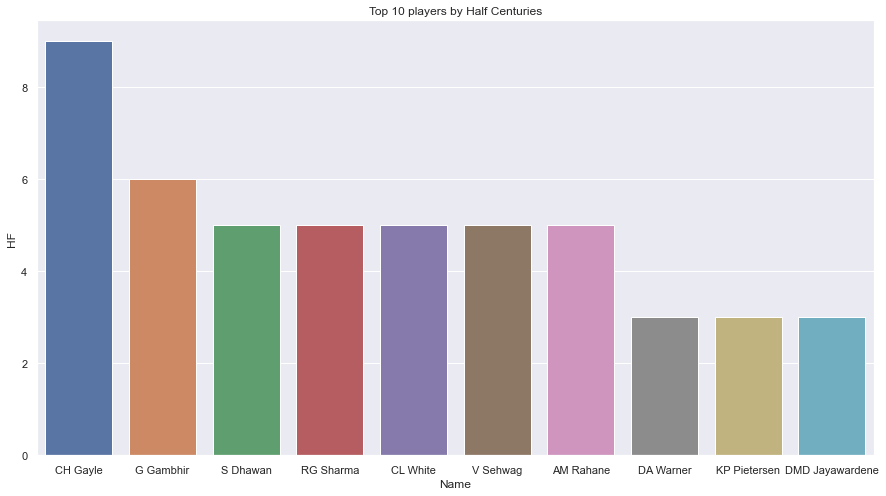

In [222]:
plt.figure(figsize=(15,8))
b1=data2.groupby('Name')['HF'].sum().sort_values(ascending = False ).head(10)
b1= b1.reset_index() 
b1.columns = ['Name' ,'HF']
sns.barplot(data= b1 , x= 'Name' , y ='HF')
plt.title("Top 10 players by Half Centuries");

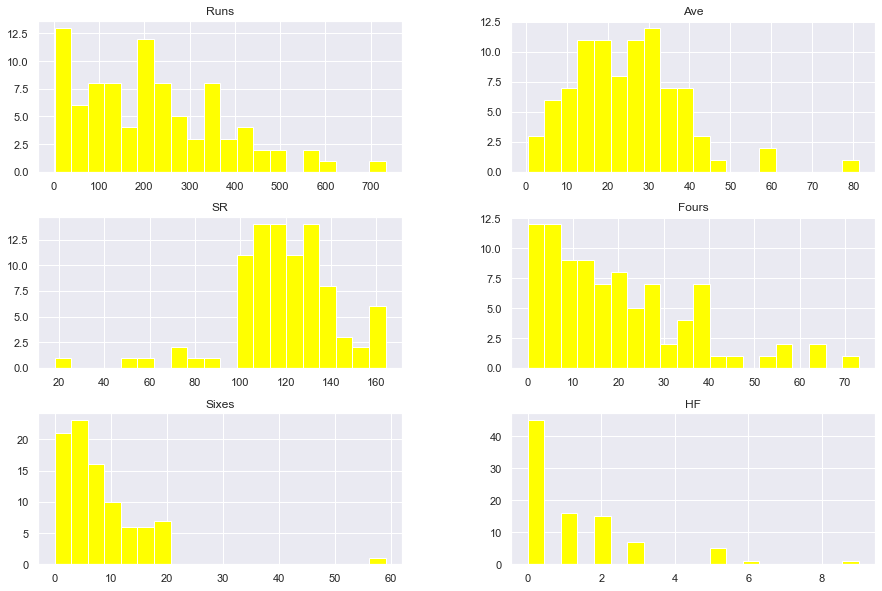

In [224]:
data2.hist(bins = 20, figsize = (15, 10), color = 'yellow')
plt.show()

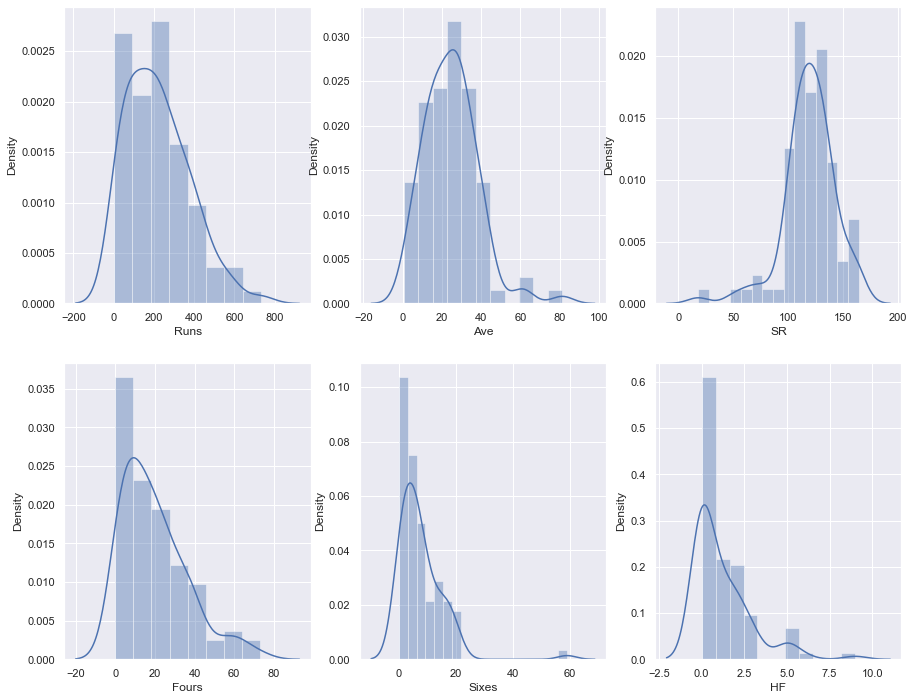

In [225]:
plt.figure(figsize=(15, 12))
col = 1
for i in data2.drop(columns='Name').columns:
    plt.subplot(2, 3, col)
    sns.distplot(data2[i], color = 'b')
    col += 1 

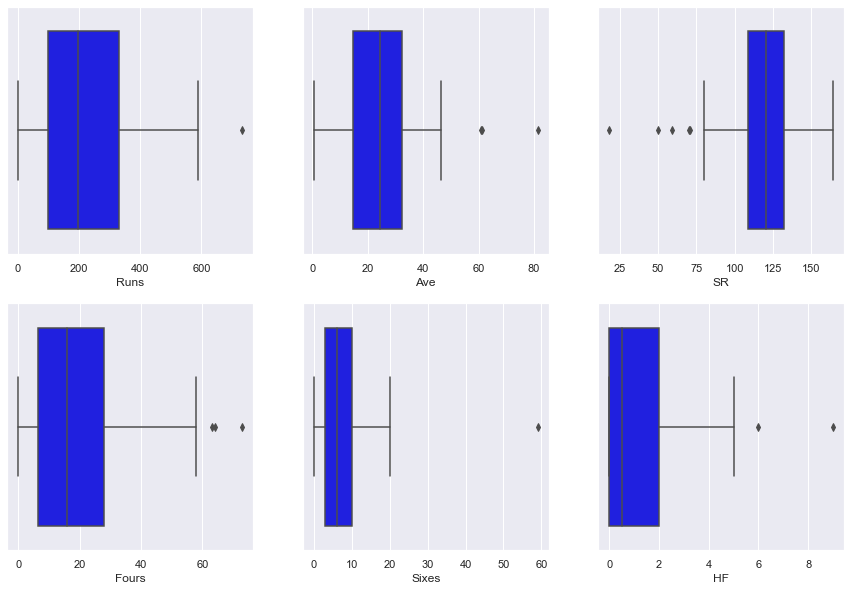

In [226]:
plt.figure(figsize=(15, 10))
col = 1
for i in data2.drop(columns='Name').columns:
    plt.subplot(2, 3, col)
    sns.boxplot(data2[i],color='blue')
    col += 1

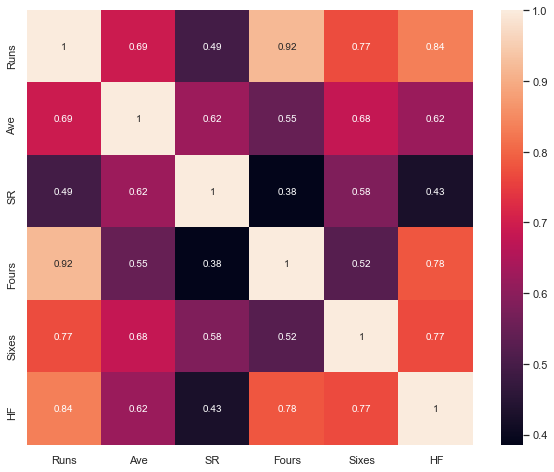

In [227]:
#checking for correlation
plt.figure(figsize=(10,8))
corr=data2.drop(columns='Name').corr()
sns.heatmap(corr,annot=True);

In [228]:
#scaling the numeric variables
cc = data2.iloc[:,1:7] 
cc1 = cc.apply(zscore)
cc1.head()

,Runs,Ave,SR,Fours,Sixes,HF
1,3.301945,2.683984,1.767325,1.607207,6.462679,4.651551
3,2.381639,0.896390,1.036605,2.710928,1.184173,2.865038
5,1.770248,0.610640,1.788154,2.281703,1.435530,2.269533
7,1.667276,1.388883,1.297182,1.300618,1.561209,2.269533
9,2.246490,1.174755,0.444038,2.343021,1.309851,2.269533


In [229]:
#checking for the within sum of squares
wss =[] 
for i in range(1,6):
    KM = KMeans(n_clusters=i)
    KM.fit(cc1)
    wss.append(KM.inertia_)
wss

[540.0000000000001,
 296.26135354732025,
 223.36518460916952,
 178.1750796759041,
 145.36165896107826]

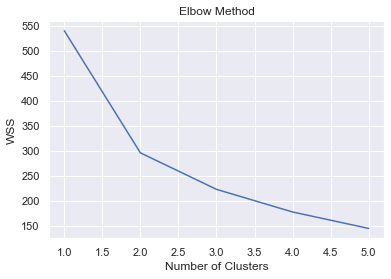

In [230]:
#plotting to check for optimal clustres 
plt.plot(range(1,6), wss);
plt.title('Elbow Method');
plt.xlabel("Number of Clusters")
plt.ylabel("WSS");

In [231]:
#using 2 centroids
k_means = KMeans(n_clusters = 2)
k_means.fit(cc1)
labels = k_means.labels_

In [232]:
# Calculating silhouette_score
silhouette_score(cc1,labels)

0.41111085574076756

In [233]:
#plotting silhouette score for different centroids
kmeans_kwargs = {
   "init": "random",
   "n_init": 10,
   "max_iter": 300,
   "random_state": 42,
}


silhouette_coefficients = []

 # Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(cc1)
    score = silhouette_score(cc1,kmeans.labels_)
    silhouette_coefficients.append(score)

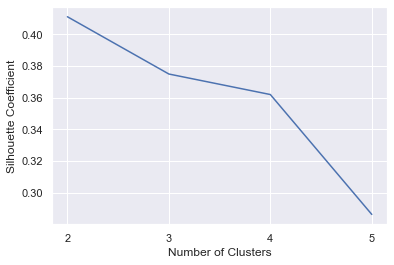

In [234]:
plt.plot(range(2,6), silhouette_coefficients)
plt.xticks(range(2, 6))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [235]:
#attaching the labels to the original data
data2['cluster']=labels
data2.head()

,Name,Runs,Ave,SR,Fours,Sixes,HF,cluster
1,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0,1
3,G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0,1
5,V Sehwag,495.0,33.00,161.23,57.0,19.0,5.0,1
7,CL White,479.0,43.54,149.68,41.0,20.0,5.0,1
9,S Dhawan,569.0,40.64,129.61,58.0,18.0,5.0,1


In [236]:
#viewing the distribution of the clusters
data2.cluster.value_counts().sort_index()

0    55
1    35
Name: cluster, dtype: int64

In [237]:
#aggregating the clusters with the numeric variables with their mean
aggdata=data2.iloc[:,0:9].groupby('cluster').mean()
aggdata['Freq']=data2.cluster.value_counts().sort_index()
aggdata

,Runs,Ave,SR,Fours,Sixes,HF,Freq
cluster,,,,,,,
0,122.745455,17.582000,110.481455,10.309091,3.636364,0.218182,55
1,372.657143,35.962286,132.808286,34.685714,13.771429,2.714286,35


In [238]:
#based on the above table renaming/ranking the playes in Grade A and Grade B
data2['cluster'] = data2['cluster'].replace({1: 'Grade A', 0: 'Grade B'})

In [239]:
#list of Grade A players
Grade_A = data2[data2['cluster'] == 'Grade A']
Grade_A.head(10)

,Name,Runs,Ave,SR,Fours,Sixes,HF,cluster
1,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0,Grade A
3,G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0,Grade A
5,V Sehwag,495.0,33.00,161.23,57.0,19.0,5.0,Grade A
7,CL White,479.0,43.54,149.68,41.0,20.0,5.0,Grade A
9,S Dhawan,569.0,40.64,129.61,58.0,18.0,5.0,Grade A
11,AM Rahane,560.0,40.00,129.33,73.0,10.0,5.0,Grade A
13,KP Pietersen,305.0,61.00,147.34,22.0,20.0,3.0,Grade A
15,RG Sharma,433.0,30.92,126.60,39.0,18.0,5.0,Grade A
17,AB de Villiers,319.0,39.87,161.11,26.0,15.0,3.0,Grade A
19,JP Duminy,244.0,81.33,128.42,13.0,11.0,2.0,Grade A


In [240]:
#list of Grade B players
Grade_B = data2[data2['cluster'] == 'Grade B']
Grade_B.head()

,Name,Runs,Ave,SR,Fours,Sixes,HF,cluster
69,MS Bisla,213.0,30.42,133.12,16.0,10.0,1.0,Grade B
73,BJ Hodge,245.0,30.62,140.00,18.0,9.0,0.0,Grade B
75,NV Ojha,255.0,23.18,113.83,21.0,13.0,1.0,Grade B
77,DB Das,126.0,42.00,135.48,9.0,6.0,0.0,Grade B
79,AC Gilchrist,172.0,34.40,120.27,21.0,4.0,1.0,Grade B


# part:-5


1. List down all possible dimensionality reduction techniques that can be implemented using python.
2. So far you have used dimensional reduction on numeric data. Is it possible to do the same on a multimedia data [images and video] and 
text data ? Please illustrate your findings using a simple implementation on python.

They are types of Dimensionality Reduction Techniques
           1. Feature selection
           2. Feature extraction:-
           1. Principal Component Analysis (PCA)
           2. Non-negative matrix factorization (NMF)
           3. Linear discriminant analysis (LDA)
           4. Generalized discriminant analysis (GDA)
           5. Missing Values Ratio
           6. Low Variance Filter
           7. High Correlation Filter
           8. Backward Feature Elimination
           9. Forward Feature Construction
           10. Random Forests

In [241]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

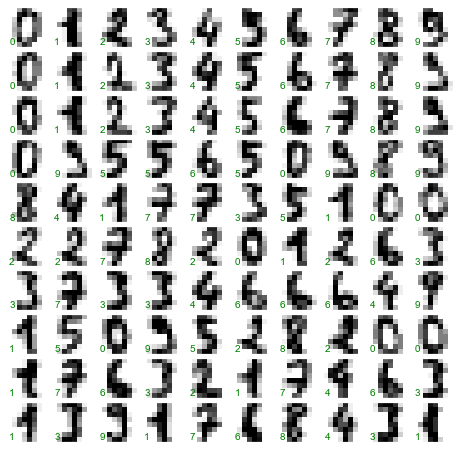

In [242]:
# visualize the first hundred of these
import matplotlib.pyplot as plt
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
subplot_kw={'xticks':[], 'yticks':[]},
gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i,ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
    transform=ax.transAxes, color='green')

In [243]:
#two-dimensional,[n_samples, n_features] representation
X = digits.data
X.shape

(1797, 64)

In [244]:
y = digits.target
y.shape

(1797,)

In [245]:
#transform the data to two dimensions using manifold learning algorithm called Isomap
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

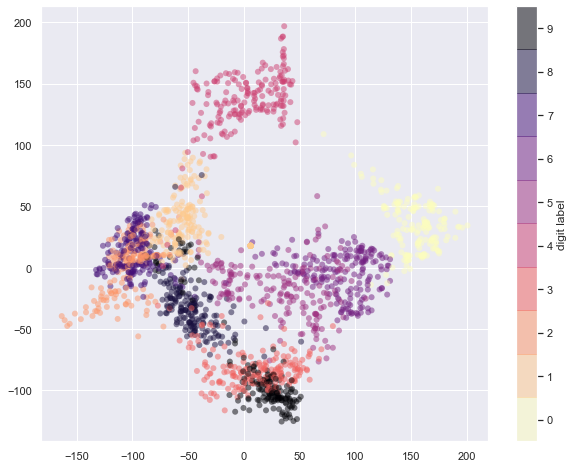

In [246]:
# plot this data 
plt.figure(figsize=(10, 8))
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,edgecolor='none', alpha=0.5,cmap=plt.cm.get_cmap('magma_r', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);

In [247]:
from sklearn.model_selection import train_test_split
 # Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=15)

In [248]:
#fit a Gaussian naive Bayes model
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
pred = model.predict(X_test)

In [249]:
# gauge its accuracy by comparing the true values of the test set to the predictions
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.8407407407407408

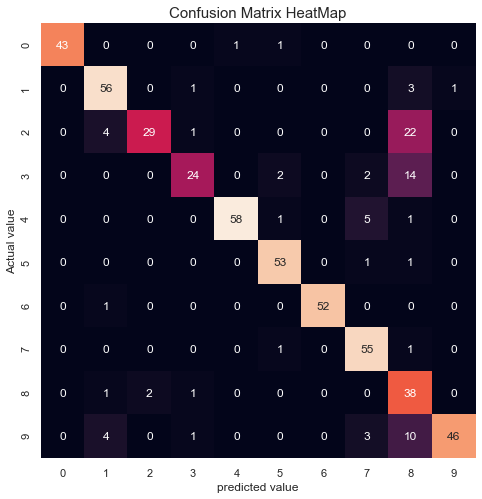

In [250]:

from sklearn.metrics import confusion_matrix
import seaborn as sns
%matplotlib inline 
sns.set(color_codes=True)
#visualization of confusion matrix in the form of a heatmap
plt.figure(figsize = (12, 8))
mat = confusion_matrix(y_test, pred)
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('Actual value');
plt.title('Confusion Matrix HeatMap', fontsize = 15);